# **Site Energy Usage Intensity Prediction**

Description: According to a report issued by the International Energy Agency (IEA), the lifecycle of buildings from construction to demolition were responsible for 37% of global energy-related and process-related CO2 emissions in 2020. Yet it is possible to drastically reduce the energy consumption of buildings by a combination of easy-to-implement fixes and state-of-the-art strategies.

The dataset consists of building characteristics, weather data for the location of the building, as well as the energy usage for the building and the given year, measured as Site Energy Usage Intensity (Site EUI). Each row in the data corresponds to a single building observed in a given year.

Data Dictionary
Covariates

id: building id

Year_Factor: anonymized year in which the weather and energy usage factors were observed

State_Factor: anonymized state in which the building is located

building_class: building classification

facility_type: building usage type

floor_area: floor area (in square feet) of the building

year_built: year in which the building was constructed

energy_star_rating: the energy star rating of the building

ELEVATION: elevation of the building location

january_min_temp: minimum temperature in January (in Fahrenheit) at the location of the building

january_avg_temp: average temperature in January (in Fahrenheit) at the location of the building

january_max_temp: maximum temperature in January (in Fahrenheit) at the location of the building

cooling_degree_days: cooling degree day for a given day is the number of degrees where the daily average temperature exceeds 65 degrees Fahrenheit. Each month is summed to produce an annual total at the location of the building.

heating_degree_days: heating degree day for a given day is the number of degrees where the daily average temperature falls under 65 degrees Fahrenheit. Each month is summed to produce an annual total at the location of the building.

precipitation_inches: annual precipitation in inches at the location of the building

snowfall_inches: annual snowfall in inches at the location of the building

snowdepth_inches: annual snow depth in inches at the location of the building

avg_temp: average temperature over a year at the location of the building

days_below_30F: total number of days below 30 degrees Fahrenheit at the location of the building

days_below_20F: total number of days below 20 degrees Fahrenheit at the location of the building

days_below_10F: total number of days below 10 degrees Fahrenheit at the location of the building

days_below_0F: total number of days below 0 degrees Fahrenheit at the location of the building

days_above_80F: total number of days above 80 degrees Fahrenheit at the location of the building

days_above_90F: total number of days above 90 degrees Fahrenheit at the location of the building

days_above_100F: total number of days above 100 degrees Fahrenheit at the location of the building

days_above_110F: total number of days above 110 degrees Fahrenheit at the location of the building

direction_max_wind_speed: wind direction for maximum wind speed at the location of the building. Given in 360-degree compass point directions (e.g. 360 = north, 180 = south, etc.).

direction_peak_wind_speed: wind direction for peak wind gust speed at the location of the building. Given in 360-degree compass point directions (e.g. 360 = north, 180 = south, etc.).

max_wind_speed: maximum wind speed at the location of the building

days_with_fog: number of days with fog at the location of the building


## Target
site_eui: Site Energy Usage Intensity is the amount of heat and electricity consumed by a building as reflected in utility bills

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
ROOT = "/content/drive/MyDrive/ML/SEUI"
os.chdir(ROOT)

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
import numpy as np
import seaborn as sns

from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [4]:
pd.set_option('display.max_columns', None)
EUI_Data = pd.read_csv('train_dataset.csv')
EUI_Data.head(5)

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,february_max_temp,march_min_temp,march_avg_temp,march_max_temp,april_min_temp,april_avg_temp,april_max_temp,may_min_temp,may_avg_temp,may_max_temp,june_min_temp,june_avg_temp,june_max_temp,july_min_temp,july_avg_temp,july_max_temp,august_min_temp,august_avg_temp,august_max_temp,september_min_temp,september_avg_temp,september_max_temp,october_min_temp,october_avg_temp,october_max_temp,november_min_temp,november_avg_temp,november_max_temp,december_min_temp,december_avg_temp,december_max_temp,cooling_degree_days,heating_degree_days,precipitation_inches,snowfall_inches,snowdepth_inches,avg_temp,days_below_30F,days_below_20F,days_below_10F,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
0,1,State_1,Commercial,Grocery_store_or_food_market,61242.0,1942.0,11.0,2.4,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,1.0,1.0,NaN,248.682615,0
1,1,State_1,Commercial,Warehouse_Distribution_or_Shipping_center,274000.0,1955.0,45.0,1.8,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,NaN,1.0,12.0,26.500150,1
2,1,State_1,Commercial,Retail_Enclosed_mall,280025.0,1951.0,97.0,1.8,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,NaN,1.0,12.0,24.693619,2
3,1,State_1,Commercial,Education_Other_classroom,55325.0,1980.0,46.0,1.8,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,NaN,1.0,12.0,48.406926,3
4,1,State_1,Commercial,Warehouse_Nonrefrigerated,66000.0,1985.0,100.0,2.4,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,1.0,1.0,NaN,3.899395,4


In [5]:
EUI_Data.shape

(75757, 64)

In [6]:
EUI_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75757 entries, 0 to 75756
Data columns (total 64 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year_Factor                75757 non-null  int64  
 1   State_Factor               75757 non-null  object 
 2   building_class             75757 non-null  object 
 3   facility_type              75757 non-null  object 
 4   floor_area                 75757 non-null  float64
 5   year_built                 73920 non-null  float64
 6   energy_star_rating         49048 non-null  float64
 7   ELEVATION                  75757 non-null  float64
 8   january_min_temp           75757 non-null  int64  
 9   january_avg_temp           75757 non-null  float64
 10  january_max_temp           75757 non-null  int64  
 11  february_min_temp          75757 non-null  int64  
 12  february_avg_temp          75757 non-null  float64
 13  february_max_temp          75757 non-null  int

In [7]:
EUI_Data.isnull().sum()

Year_Factor                      0
State_Factor                     0
building_class                   0
facility_type                    0
floor_area                       0
                             ...  
direction_peak_wind_speed    41811
max_wind_speed               41082
days_with_fog                45796
site_eui                         0
id                               0
Length: 64, dtype: int64

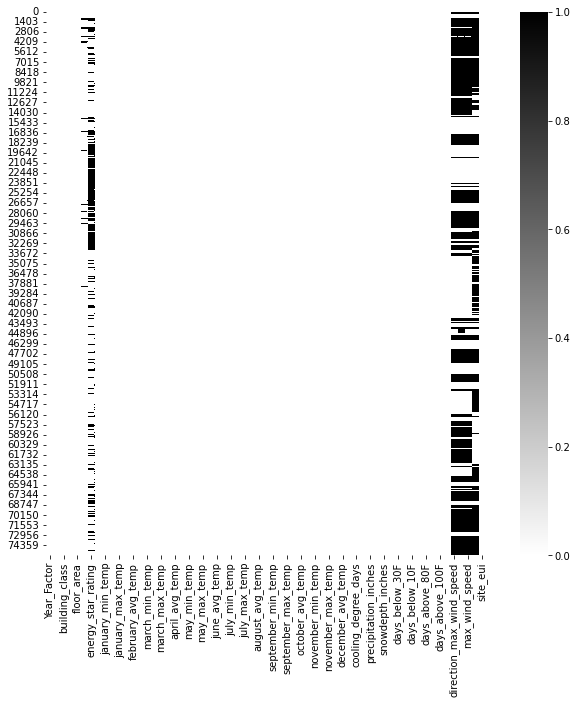

In [8]:
## missing values
plt.figure(figsize=(10,10))
sns.heatmap(EUI_Data.isnull(),cmap='binary')


In [9]:
cols = []
per = []
miss_val_col = []

for col in EUI_Data.columns:
    cols.append(col)
    pert = (EUI_Data[col].isnull().sum()/EUI_Data.shape[0])*100
    per.append(pert)
    if EUI_Data[col].isnull().sum() > 0:
        miss_val_col.append(col)        
df_null_pert = pd.DataFrame({"columns" : cols, "Percentage" : per})
df_null_pert


,columns,Percentage
0,Year_Factor,0.000000
1,State_Factor,0.000000
2,building_class,0.000000
3,facility_type,0.000000
4,floor_area,0.000000
...,...,...
59,direction_peak_wind_speed,55.190939
60,max_wind_speed,54.228652
61,days_with_fog,60.451179
62,site_eui,0.000000


In [10]:
mask = df_null_pert['Percentage'] > 1
df_null_pert[mask].style.background_gradient(cmap='Reds')

,columns,Percentage
5,year_built,2.424858
6,energy_star_rating,35.256148
58,direction_max_wind_speed,54.228652
59,direction_peak_wind_speed,55.190939
60,max_wind_speed,54.228652
61,days_with_fog,60.451179


In [11]:
EUI_Data['year_built'].unique()

array([1942., 1955., 1951., 1980., 1985., 1956., 1982., 1947., 1929.,
       1979., 1927., 1960., 1924.,   nan, 1949., 1926., 1914., 1973.,
       1900., 1913., 1962., 1989., 1967., 1954., 1986., 1906., 1912.,
       1902., 1920., 1905., 1997., 1909., 2002., 1974., 1907., 1908.,
       1988., 1987., 1923., 1948., 1966., 1975., 1934., 1938., 1983.,
       2003., 1915., 1961., 1911., 1925., 1964., 1953., 1957., 2006.,
       1990., 1991., 1969., 1968., 1910., 1937., 1971., 1965., 1946.,
       1917., 1901., 2000., 2008., 1999., 1981., 2001., 1978., 1898.,
       1928., 1970., 1918., 1930., 1903., 1936., 1921., 1922., 1984.,
       1976., 1952., 1959., 1916., 1963., 1972., 1919., 1931., 1958.,
          0., 1994., 1940., 2010., 2009., 1889., 1939., 1945., 1904.,
       1932., 1941., 1977., 1993., 1992., 1950., 1944., 1935., 1996.,
       1995., 1933., 1943., 2007., 2005., 2004., 1869., 2011., 2012.,
       1864., 1998., 1895., 1896., 1875., 1880., 1888., 1897., 1891.,
       2013., 1887.,

In [12]:
df_null_pert[mask]['columns']

5                    year_built
6            energy_star_rating
58     direction_max_wind_speed
59    direction_peak_wind_speed
60               max_wind_speed
61                days_with_fog
Name: columns, dtype: object

### Droping the columns with missing values

In [13]:
EUI_Data.drop(columns=['energy_star_rating','direction_max_wind_speed','direction_peak_wind_speed','max_wind_speed','days_with_fog'],inplace=True)

#### Droping the rows with null value

In [14]:
EUI_Data.dropna(inplace=True)

In [15]:
EUI_Data

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,february_max_temp,march_min_temp,march_avg_temp,march_max_temp,april_min_temp,april_avg_temp,april_max_temp,may_min_temp,may_avg_temp,may_max_temp,june_min_temp,june_avg_temp,june_max_temp,july_min_temp,july_avg_temp,july_max_temp,august_min_temp,august_avg_temp,august_max_temp,september_min_temp,september_avg_temp,september_max_temp,october_min_temp,october_avg_temp,october_max_temp,november_min_temp,november_avg_temp,november_max_temp,december_min_temp,december_avg_temp,december_max_temp,cooling_degree_days,heating_degree_days,precipitation_inches,snowfall_inches,snowdepth_inches,avg_temp,days_below_30F,days_below_20F,days_below_10F,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,site_eui,id
0,1,State_1,Commercial,Grocery_store_or_food_market,61242.0,1942.0,2.4,36,50.500000,68,35,50.589286,73,40,53.693548,80,41,55.500000,78,46,56.854839,84,50,60.500000,90,52,62.725806,84,52,62.161290,85,52,64.650000,90,47,63.016129,83,43,53.800000,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,248.682615,0
1,1,State_1,Commercial,Warehouse_Distribution_or_Shipping_center,274000.0,1955.0,1.8,36,50.500000,68,35,50.589286,73,40,53.693548,80,41,55.500000,78,46,56.854839,84,50,60.500000,90,52,62.725806,84,52,62.161290,85,52,64.650000,90,47,63.016129,83,43,53.800000,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,26.500150,1
2,1,State_1,Commercial,Retail_Enclosed_mall,280025.0,1951.0,1.8,36,50.500000,68,35,50.589286,73,40,53.693548,80,41,55.500000,78,46,56.854839,84,50,60.500000,90,52,62.725806,84,52,62.161290,85,52,64.650000,90,47,63.016129,83,43,53.800000,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,24.693619,2
3,1,State_1,Commercial,Education_Other_classroom,55325.0,1980.0,1.8,36,50.500000,68,35,50.589286,73,40,53.693548,80,41,55.500000,78,46,56.854839,84,50,60.500000,90,52,62.725806,84,52,62.161290,85,52,64.650000,90,47,63.016129,83,43,53.800000,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,48.406926,3
4,1,State_1,Commercial,Warehouse_Nonrefrigerated,66000.0,1985.0,2.4,36,50.500000,68,35,50.589286,73,40,53.693548,80,41,55.500000,78,46,56.854839,84,50,60.500000,90,52,62.725806,84,52,62.161290,85,52,64.650000,90,47,63.016129,83,43,53.800000,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,3.899395,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75752,6,State_11,Commercial,Office_Uncategorized,20410.0,1995.0,36.6,28,43.451613,56,34,47.672414,64,35,49.354839,71,40,56.266667,89,45,59.193548,88,47,63.566667,91,54,66.951613,87,52,68.612903,91,44,61.383333,79,39,55.403226,68,40,51.283333,71,24,38.532258,51,260,3772,45.03,1.4,1,55.147541,6,0,0,0,25,3,0,0,132.918411,75752
75753,6,State_11,Residential,5plus_Unit_Building,40489.0,1910.0,36.6,28,43.451613,56,34,47.672414,64,35,49.354839,71,40,56.266667,89,45,59.193548,88,47,63.566667,91,54,66.951613,87,52,68.612903,91,44,61.383333,79,39,55.403226,68,40,51.283333,71,24,38.532258,51,260,3772,45.03,1.4,1,55.147541,6,0,0,0,25,3,0,0,39.483672,75753
75754,6,State_11,Commercial,Commercial_Other,28072.0,1917.0,36.6,26,36.612903,48,30,41.637931,58,29,41.338710,62,34,50.183333,79,40,52.145161,79,41,56.233333,86,48,58.758065,81,48,61.612903,87,41,53.783333,73,37,47.661290,59,34,44.650000,62,15,30.338710,46,55,6218,106.32,36.6,438,47.911202,26,2,0,0,6,0,0,0,48.404398,75754
75755,6,State_11,Commercial,Commercial_Other,53575.0,2012.0,36.6,26,36.612903,48,30,41.637931,58,29,41.338710,62,34,50.183333,79,40,52.145161,79,41,56.233333,86,48,58.758065,81,48,61.612903,87,41,53.783333,73,37,47.661290,59,34,44.650000,62,15,30.338710,46,55,6218

##### fetching only non zero valyes if the year built columns

In [16]:
EUI_Data= EUI_Data[EUI_Data['year_built'] != 0]

In [17]:
EUI_Data

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,february_max_temp,march_min_temp,march_avg_temp,march_max_temp,april_min_temp,april_avg_temp,april_max_temp,may_min_temp,may_avg_temp,may_max_temp,june_min_temp,june_avg_temp,june_max_temp,july_min_temp,july_avg_temp,july_max_temp,august_min_temp,august_avg_temp,august_max_temp,september_min_temp,september_avg_temp,september_max_temp,october_min_temp,october_avg_temp,october_max_temp,november_min_temp,november_avg_temp,november_max_temp,december_min_temp,december_avg_temp,december_max_temp,cooling_degree_days,heating_degree_days,precipitation_inches,snowfall_inches,snowdepth_inches,avg_temp,days_below_30F,days_below_20F,days_below_10F,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,site_eui,id
0,1,State_1,Commercial,Grocery_store_or_food_market,61242.0,1942.0,2.4,36,50.500000,68,35,50.589286,73,40,53.693548,80,41,55.500000,78,46,56.854839,84,50,60.500000,90,52,62.725806,84,52,62.161290,85,52,64.650000,90,47,63.016129,83,43,53.800000,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,248.682615,0
1,1,State_1,Commercial,Warehouse_Distribution_or_Shipping_center,274000.0,1955.0,1.8,36,50.500000,68,35,50.589286,73,40,53.693548,80,41,55.500000,78,46,56.854839,84,50,60.500000,90,52,62.725806,84,52,62.161290,85,52,64.650000,90,47,63.016129,83,43,53.800000,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,26.500150,1
2,1,State_1,Commercial,Retail_Enclosed_mall,280025.0,1951.0,1.8,36,50.500000,68,35,50.589286,73,40,53.693548,80,41,55.500000,78,46,56.854839,84,50,60.500000,90,52,62.725806,84,52,62.161290,85,52,64.650000,90,47,63.016129,83,43,53.800000,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,24.693619,2
3,1,State_1,Commercial,Education_Other_classroom,55325.0,1980.0,1.8,36,50.500000,68,35,50.589286,73,40,53.693548,80,41,55.500000,78,46,56.854839,84,50,60.500000,90,52,62.725806,84,52,62.161290,85,52,64.650000,90,47,63.016129,83,43,53.800000,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,48.406926,3
4,1,State_1,Commercial,Warehouse_Nonrefrigerated,66000.0,1985.0,2.4,36,50.500000,68,35,50.589286,73,40,53.693548,80,41,55.500000,78,46,56.854839,84,50,60.500000,90,52,62.725806,84,52,62.161290,85,52,64.650000,90,47,63.016129,83,43,53.800000,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,3.899395,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75752,6,State_11,Commercial,Office_Uncategorized,20410.0,1995.0,36.6,28,43.451613,56,34,47.672414,64,35,49.354839,71,40,56.266667,89,45,59.193548,88,47,63.566667,91,54,66.951613,87,52,68.612903,91,44,61.383333,79,39,55.403226,68,40,51.283333,71,24,38.532258,51,260,3772,45.03,1.4,1,55.147541,6,0,0,0,25,3,0,0,132.918411,75752
75753,6,State_11,Residential,5plus_Unit_Building,40489.0,1910.0,36.6,28,43.451613,56,34,47.672414,64,35,49.354839,71,40,56.266667,89,45,59.193548,88,47,63.566667,91,54,66.951613,87,52,68.612903,91,44,61.383333,79,39,55.403226,68,40,51.283333,71,24,38.532258,51,260,3772,45.03,1.4,1,55.147541,6,0,0,0,25,3,0,0,39.483672,75753
75754,6,State_11,Commercial,Commercial_Other,28072.0,1917.0,36.6,26,36.612903,48,30,41.637931,58,29,41.338710,62,34,50.183333,79,40,52.145161,79,41,56.233333,86,48,58.758065,81,48,61.612903,87,41,53.783333,73,37,47.661290,59,34,44.650000,62,15,30.338710,46,55,6218,106.32,36.6,438,47.911202,26,2,0,0,6,0,0,0,48.404398,75754
75755,6,State_11,Commercial,Commercial_Other,53575.0,2012.0,36.6,26,36.612903,48,30,41.637931,58,29,41.338710,62,34,50.183333,79,40,52.145161,79,41,56.233333,86,48,58.758065,81,48,61.612903,87,41,53.783333,73,37,47.661290,59,34,44.650000,62,15,30.338710,46,55,6218

In [18]:
EUI_Data['State_Factor'].unique()

array(['State_1', 'State_2', 'State_4', 'State_6', 'State_8', 'State_10',
       'State_11'], dtype=object)

In [19]:
EUI_Data['building_class'].unique()

array(['Commercial', 'Residential'], dtype=object)

In [20]:
EUI_Data['Year_Factor'].unique()

array([1, 2, 3, 4, 5, 6])

In [21]:
EUI_Data['facility_type'].unique()

array(['Grocery_store_or_food_market',
       'Warehouse_Distribution_or_Shipping_center',
       'Retail_Enclosed_mall', 'Education_Other_classroom',
       'Warehouse_Nonrefrigerated', 'Warehouse_Selfstorage',
       'Office_Uncategorized', 'Data_Center', 'Commercial_Other',
       'Mixed_Use_Predominantly_Commercial',
       'Office_Medical_non_diagnostic', 'Education_College_or_university',
       'Industrial', 'Public_Assembly_Entertainment_culture',
       'Retail_Vehicle_dealership_showroom', 'Retail_Uncategorized',
       'Lodging_Hotel', 'Retail_Strip_shopping_mall',
       'Education_Uncategorized', 'Public_Assembly_Drama_theater',
       'Public_Assembly_Social_meeting', 'Religious_worship',
       'Mixed_Use_Commercial_and_Residential',
       'Office_Bank_or_other_financial', 'Parking_Garage',
       'Commercial_Unknown', 'Service_Vehicle_service_repair_shop',
       'Service_Drycleaning_or_Laundry', 'Public_Assembly_Recreation',
       'Service_Uncategorized', 'Warehouse_

In [22]:
EUI_Data.describe()

,Year_Factor,floor_area,year_built,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,february_max_temp,march_min_temp,march_avg_temp,march_max_temp,april_min_temp,april_avg_temp,april_max_temp,may_min_temp,may_avg_temp,may_max_temp,june_min_temp,june_avg_temp,june_max_temp,july_min_temp,july_avg_temp,july_max_temp,august_min_temp,august_avg_temp,august_max_temp,september_min_temp,september_avg_temp,september_max_temp,october_min_temp,october_avg_temp,october_max_temp,november_min_temp,november_avg_temp,november_max_temp,december_min_temp,december_avg_temp,december_max_temp,cooling_degree_days,heating_degree_days,precipitation_inches,snowfall_inches,snowdepth_inches,avg_temp,days_below_30F,days_below_20F,days_below_10F,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,site_eui,id
count,73914.000000,7.391400e+04,73914.000000,73914.000000,73914.000000,73914.000000,73914.000000,73914.000000,73914.000000,73914.000000,73914.000000,73914.000000,73914.000000,73914.000000,73914.000000,73914.000000,73914.000000,73914.000000,73914.000000,73914.000000,73914.000000,73914.000000,73914.000000,73914.000000,73914.000000,73914.000000,73914.000000,73914.000000,73914.000000,73914.000000,73914.000000,73914.000000,73914.000000,73914.000000,73914.000000,73914.000000,73914.000000,73914.000000,73914.000000,73914.000000,73914.000000,73914.000000,73914.000000,73914.000000,73914.000000,73914.000000,73914.000000,73914.000000,73914.000000,73914.000000,73914.000000,73914.000000,73914.000000,73914.0,73914.000000,73914.000000
mean,4.397624,1.660749e+05,1952.465243,38.329108,11.232067,34.126456,58.886206,11.418933,35.317891,58.262170,21.405593,44.324794,70.779284,31.909760,53.698518,82.581054,44.658955,63.712960,88.939903,51.100346,71.068098,91.324296,60.607760,76.617288,95.503396,58.535271,75.378317,92.555889,50.787956,69.580827,92.123157,38.124117,58.652671,81.009511,28.526463,48.038293,71.114390,22.642165,41.522583,64.404118,1201.973402,4351.179127,42.708309,29.462835,166.725154,56.103960,49.220513,17.688530,4.968612,0.896677,82.481857,13.722881,0.181576,0.0,82.755150,38474.927280
std,1.463808,2.440478e+05,32.613687,52.204182,9.190525,6.785505,5.090298,12.449381,8.736377,8.272523,9.880519,6.535913,7.622037,5.502201,2.356015,4.017689,4.163534,2.763284,2.751933,3.384986,2.816914,3.403445,4.144163,4.038447,4.028996,4.434065,3.789805,4.015407,4.272979,3.593679,4.974161,5.014990,2.521820,5.454605,7.089394,3.962978,4.221996,9.022564,5.807422,6.012656,385.793403,786.808283,10.034281,17.656359,175.308499,2.111161,27.419524,14.480531,7.115870,2.923719,24.551778,9.549999,1.195444,0.0,57.838325,21692.500511
min,1.000000,1.800000e+03,1600.000000,1.800000,-19.000000,10.806452,42.000000,-13.000000,13.250000,38.000000,-9.000000,25.854839,53.000000,16.000000,45.033333,70.000000,32.000000,52.145161,77.000000,40.000000,56.233333,81.000000,48.000000,58.758065,81.000000,41.000000,61.612903,76.000000,37.000000,53.783333,73.000000,21.000000,47.661290,59.000000,4.000000,30.766667,53.000000,-10.000000,23.790323,42.000000,55.000000,1427.000000,4.160000,0.000000,0.000000,44.512329,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.0,1.001169,0.000000
25%,3.000000,6.279000e+04,1927.000000,11.900000,6.000000,29.827586,56.000000,2.000000,31.625000,55.000000,12.000000,38.096774,62.000000,26.000000,52.333333,80.000000,42.000000,62.790323,88.000000,50.000000,70.983333,89.000000,58.000000,76.145161,95.000000,57.000000,74.516129,90.000000,47.000000,68.200000,91.000000,35.000000,58.048387,78.000000,22.000000,45.250000,69.000000,17.000000,38.532258,60.000000,1128.000000,3978.000000,39.350000,9.600000,10.000000,55.147541,22.000000,5.000000,0.000000,0.000000,72.000000,6.000000,0.000000,0.0,55.157951,19721.250000
50%,5.000000,9.200000e+04,1951.000000,25.000000,11.000000,34.451613,59.000000,9.000000,34.107143,61.000000,25.000000,43.645161,71.000000,32.000000,53.333333,82.000000,45.000000,62.790323,89.000000,52.

In [23]:
EUI_Data.describe(include=['O']).T

,count,unique,top,freq
State_Factor,73914,7,State_6,50007
building_class,73914,2,Residential,43150
facility_type,73914,60,Multifamily_Uncategorized,39072


In [24]:
EUI_Data[EUI_Data.duplicated()]

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,february_max_temp,march_min_temp,march_avg_temp,march_max_temp,april_min_temp,april_avg_temp,april_max_temp,may_min_temp,may_avg_temp,may_max_temp,june_min_temp,june_avg_temp,june_max_temp,july_min_temp,july_avg_temp,july_max_temp,august_min_temp,august_avg_temp,august_max_temp,september_min_temp,september_avg_temp,september_max_temp,october_min_temp,october_avg_temp,october_max_temp,november_min_temp,november_avg_temp,november_max_temp,december_min_temp,december_avg_temp,december_max_temp,cooling_degree_days,heating_degree_days,precipitation_inches,snowfall_inches,snowdepth_inches,avg_temp,days_below_30F,days_below_20F,days_below_10F,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,site_eui,id


## Data Visualization

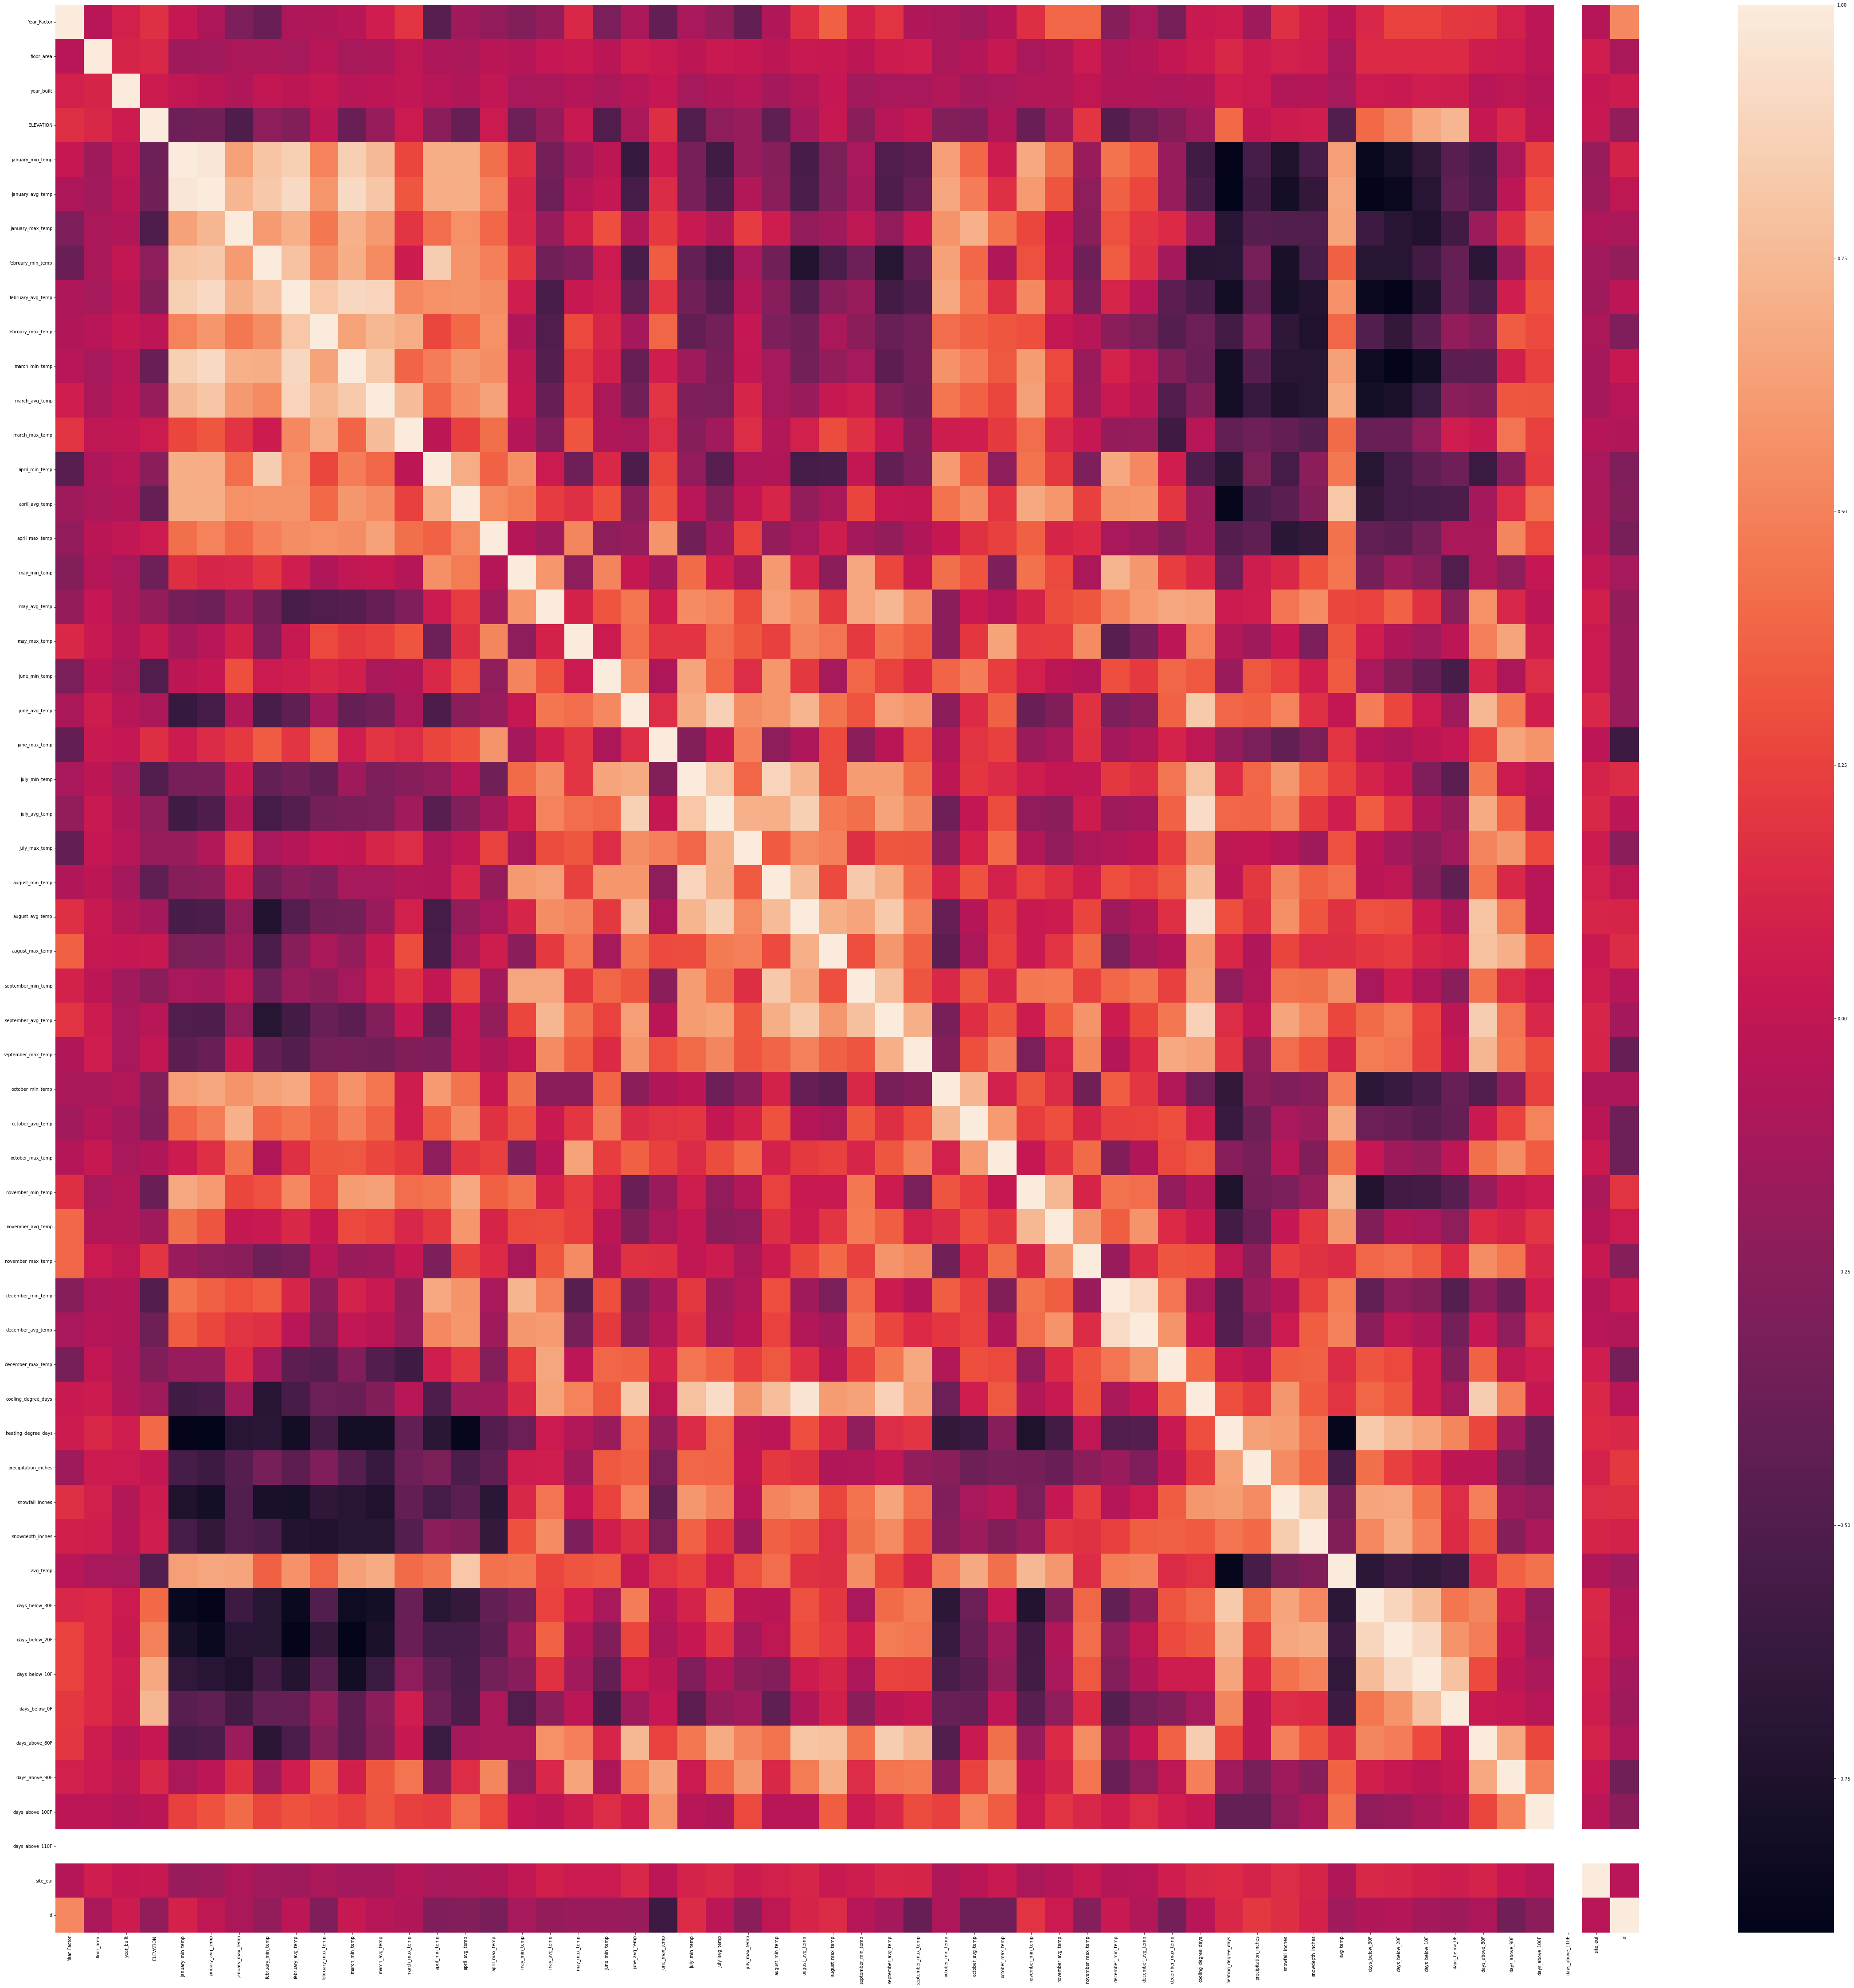

In [25]:
plt.figure(figsize=(80,80))
sns.heatmap(EUI_Data.corr())

In [26]:
def ordinal_encoder(df, feats): 
  for feat in feats:    
    feat_val = list(1+np.arange(df[feat].nunique()))
    feat_key = list(df[feat].sort_values().unique())
    print(feat_key)
    feat_dict = dict(zip(feat_key, feat_val))
    df[feat] = df[feat].map(feat_dict)
  return df

EUI_Data = ordinal_encoder(EUI_Data, EUI_Data[['State_Factor','building_class','facility_type']].columns)
EUI_Data

['State_1', 'State_10', 'State_11', 'State_2', 'State_4', 'State_6', 'State_8']
['Commercial', 'Residential']
['2to4_Unit_Building', '5plus_Unit_Building', 'Commercial_Other', 'Commercial_Unknown', 'Data_Center', 'Education_College_or_university', 'Education_Other_classroom', 'Education_Preschool_or_daycare', 'Education_Uncategorized', 'Food_Sales', 'Food_Service_Other', 'Food_Service_Restaurant_or_cafeteria', 'Food_Service_Uncategorized', 'Grocery_store_or_food_market', 'Health_Care_Inpatient', 'Health_Care_Outpatient_Clinic', 'Health_Care_Outpatient_Uncategorized', 'Health_Care_Uncategorized', 'Industrial', 'Laboratory', 'Lodging_Dormitory_or_fraternity_sorority', 'Lodging_Hotel', 'Lodging_Other', 'Lodging_Uncategorized', 'Mixed_Use_Commercial_and_Residential', 'Mixed_Use_Predominantly_Commercial', 'Mixed_Use_Predominantly_Residential', 'Multifamily_Uncategorized', 'Nursing_Home', 'Office_Bank_or_other_financial', 'Office_Medical_non_diagnostic', 'Office_Mixed_use', 'Office_Uncategor

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,february_max_temp,march_min_temp,march_avg_temp,march_max_temp,april_min_temp,april_avg_temp,april_max_temp,may_min_temp,may_avg_temp,may_max_temp,june_min_temp,june_avg_temp,june_max_temp,july_min_temp,july_avg_temp,july_max_temp,august_min_temp,august_avg_temp,august_max_temp,september_min_temp,september_avg_temp,september_max_temp,october_min_temp,october_avg_temp,october_max_temp,november_min_temp,november_avg_temp,november_max_temp,december_min_temp,december_avg_temp,december_max_temp,cooling_degree_days,heating_degree_days,precipitation_inches,snowfall_inches,snowdepth_inches,avg_temp,days_below_30F,days_below_20F,days_below_10F,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,site_eui,id
0,1,1,1,14,61242.0,1942.0,2.4,36,50.500000,68,35,50.589286,73,40,53.693548,80,41,55.500000,78,46,56.854839,84,50,60.500000,90,52,62.725806,84,52,62.161290,85,52,64.650000,90,47,63.016129,83,43,53.800000,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,248.682615,0
1,1,1,1,56,274000.0,1955.0,1.8,36,50.500000,68,35,50.589286,73,40,53.693548,80,41,55.500000,78,46,56.854839,84,50,60.500000,90,52,62.725806,84,52,62.161290,85,52,64.650000,90,47,63.016129,83,43,53.800000,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,26.500150,1
2,1,1,1,49,280025.0,1951.0,1.8,36,50.500000,68,35,50.589286,73,40,53.693548,80,41,55.500000,78,46,56.854839,84,50,60.500000,90,52,62.725806,84,52,62.161290,85,52,64.650000,90,47,63.016129,83,43,53.800000,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,24.693619,2
3,1,1,1,7,55325.0,1980.0,1.8,36,50.500000,68,35,50.589286,73,40,53.693548,80,41,55.500000,78,46,56.854839,84,50,60.500000,90,52,62.725806,84,52,62.161290,85,52,64.650000,90,47,63.016129,83,43,53.800000,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,48.406926,3
4,1,1,1,57,66000.0,1985.0,2.4,36,50.500000,68,35,50.589286,73,40,53.693548,80,41,55.500000,78,46,56.854839,84,50,60.500000,90,52,62.725806,84,52,62.161290,85,52,64.650000,90,47,63.016129,83,43,53.800000,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,3.899395,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75752,6,3,1,33,20410.0,1995.0,36.6,28,43.451613,56,34,47.672414,64,35,49.354839,71,40,56.266667,89,45,59.193548,88,47,63.566667,91,54,66.951613,87,52,68.612903,91,44,61.383333,79,39,55.403226,68,40,51.283333,71,24,38.532258,51,260,3772,45.03,1.4,1,55.147541,6,0,0,0,25,3,0,0,132.918411,75752
75753,6,3,2,2,40489.0,1910.0,36.6,28,43.451613,56,34,47.672414,64,35,49.354839,71,40,56.266667,89,45,59.193548,88,47,63.566667,91,54,66.951613,87,52,68.612903,91,44,61.383333,79,39,55.403226,68,40,51.283333,71,24,38.532258,51,260,3772,45.03,1.4,1,55.147541,6,0,0,0,25,3,0,0,39.483672,75753
75754,6,3,1,3,28072.0,1917.0,36.6,26,36.612903,48,30,41.637931,58,29,41.338710,62,34,50.183333,79,40,52.145161,79,41,56.233333,86,48,58.758065,81,48,61.612903,87,41,53.783333,73,37,47.661290,59,34,44.650000,62,15,30.338710,46,55,6218,106.32,36.6,438,47.911202,26,2,0,0,6,0,0,0,48.404398,75754
75755,6,3,1,3,53575.0,2012.0,36.6,26,36.612903,48,30,41.637931,58,29,41.338710,62,34,50.183333,79,40,52.145161,79,41,56.233333,86,48,58.758065,81,48,61.612903,87,41,53.783333,73,37,47.661290,59,34,44.650000,62,15,30.338710,46,55,6218,106.32,36.6,438,47.911202,26,2,0,0,6,0,0,0,592.022750,75755


In [27]:
EUI_Data.drop('id',axis=1,inplace=True)

In [28]:
EUI_Data

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,february_max_temp,march_min_temp,march_avg_temp,march_max_temp,april_min_temp,april_avg_temp,april_max_temp,may_min_temp,may_avg_temp,may_max_temp,june_min_temp,june_avg_temp,june_max_temp,july_min_temp,july_avg_temp,july_max_temp,august_min_temp,august_avg_temp,august_max_temp,september_min_temp,september_avg_temp,september_max_temp,october_min_temp,october_avg_temp,october_max_temp,november_min_temp,november_avg_temp,november_max_temp,december_min_temp,december_avg_temp,december_max_temp,cooling_degree_days,heating_degree_days,precipitation_inches,snowfall_inches,snowdepth_inches,avg_temp,days_below_30F,days_below_20F,days_below_10F,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,site_eui
0,1,1,1,14,61242.0,1942.0,2.4,36,50.500000,68,35,50.589286,73,40,53.693548,80,41,55.500000,78,46,56.854839,84,50,60.500000,90,52,62.725806,84,52,62.161290,85,52,64.650000,90,47,63.016129,83,43,53.800000,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,248.682615
1,1,1,1,56,274000.0,1955.0,1.8,36,50.500000,68,35,50.589286,73,40,53.693548,80,41,55.500000,78,46,56.854839,84,50,60.500000,90,52,62.725806,84,52,62.161290,85,52,64.650000,90,47,63.016129,83,43,53.800000,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,26.500150
2,1,1,1,49,280025.0,1951.0,1.8,36,50.500000,68,35,50.589286,73,40,53.693548,80,41,55.500000,78,46,56.854839,84,50,60.500000,90,52,62.725806,84,52,62.161290,85,52,64.650000,90,47,63.016129,83,43,53.800000,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,24.693619
3,1,1,1,7,55325.0,1980.0,1.8,36,50.500000,68,35,50.589286,73,40,53.693548,80,41,55.500000,78,46,56.854839,84,50,60.500000,90,52,62.725806,84,52,62.161290,85,52,64.650000,90,47,63.016129,83,43,53.800000,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,48.406926
4,1,1,1,57,66000.0,1985.0,2.4,36,50.500000,68,35,50.589286,73,40,53.693548,80,41,55.500000,78,46,56.854839,84,50,60.500000,90,52,62.725806,84,52,62.161290,85,52,64.650000,90,47,63.016129,83,43,53.800000,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,3.899395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75752,6,3,1,33,20410.0,1995.0,36.6,28,43.451613,56,34,47.672414,64,35,49.354839,71,40,56.266667,89,45,59.193548,88,47,63.566667,91,54,66.951613,87,52,68.612903,91,44,61.383333,79,39,55.403226,68,40,51.283333,71,24,38.532258,51,260,3772,45.03,1.4,1,55.147541,6,0,0,0,25,3,0,0,132.918411
75753,6,3,2,2,40489.0,1910.0,36.6,28,43.451613,56,34,47.672414,64,35,49.354839,71,40,56.266667,89,45,59.193548,88,47,63.566667,91,54,66.951613,87,52,68.612903,91,44,61.383333,79,39,55.403226,68,40,51.283333,71,24,38.532258,51,260,3772,45.03,1.4,1,55.147541,6,0,0,0,25,3,0,0,39.483672
75754,6,3,1,3,28072.0,1917.0,36.6,26,36.612903,48,30,41.637931,58,29,41.338710,62,34,50.183333,79,40,52.145161,79,41,56.233333,86,48,58.758065,81,48,61.612903,87,41,53.783333,73,37,47.661290,59,34,44.650000,62,15,30.338710,46,55,6218,106.32,36.6,438,47.911202,26,2,0,0,6,0,0,0,48.404398
75755,6,3,1,3,53575.0,2012.0,36.6,26,36.612903,48,30,41.637931,58,29,41.338710,62,34,50.183333,79,40,52.145161,79,41,56.233333,86,48,58.758065,81,48,61.612903,87,41,53.783333,73,37,47.661290,59,34,44.650000,62,15,30.338710,46,55,6218,106.32,36.6,438,47.911202,26,2,0,0,6,0,0,0,592.022750


In [29]:
print([col for col in EUI_Data if EUI_Data[col].nunique()==1])

['days_above_110F']


In [30]:
EUI_Data.drop('days_above_110F',axis=1,inplace=True)

In [31]:
EUI_Data

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,february_max_temp,march_min_temp,march_avg_temp,march_max_temp,april_min_temp,april_avg_temp,april_max_temp,may_min_temp,may_avg_temp,may_max_temp,june_min_temp,june_avg_temp,june_max_temp,july_min_temp,july_avg_temp,july_max_temp,august_min_temp,august_avg_temp,august_max_temp,september_min_temp,september_avg_temp,september_max_temp,october_min_temp,october_avg_temp,october_max_temp,november_min_temp,november_avg_temp,november_max_temp,december_min_temp,december_avg_temp,december_max_temp,cooling_degree_days,heating_degree_days,precipitation_inches,snowfall_inches,snowdepth_inches,avg_temp,days_below_30F,days_below_20F,days_below_10F,days_below_0F,days_above_80F,days_above_90F,days_above_100F,site_eui
0,1,1,1,14,61242.0,1942.0,2.4,36,50.500000,68,35,50.589286,73,40,53.693548,80,41,55.500000,78,46,56.854839,84,50,60.500000,90,52,62.725806,84,52,62.161290,85,52,64.650000,90,47,63.016129,83,43,53.800000,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,248.682615
1,1,1,1,56,274000.0,1955.0,1.8,36,50.500000,68,35,50.589286,73,40,53.693548,80,41,55.500000,78,46,56.854839,84,50,60.500000,90,52,62.725806,84,52,62.161290,85,52,64.650000,90,47,63.016129,83,43,53.800000,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,26.500150
2,1,1,1,49,280025.0,1951.0,1.8,36,50.500000,68,35,50.589286,73,40,53.693548,80,41,55.500000,78,46,56.854839,84,50,60.500000,90,52,62.725806,84,52,62.161290,85,52,64.650000,90,47,63.016129,83,43,53.800000,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,24.693619
3,1,1,1,7,55325.0,1980.0,1.8,36,50.500000,68,35,50.589286,73,40,53.693548,80,41,55.500000,78,46,56.854839,84,50,60.500000,90,52,62.725806,84,52,62.161290,85,52,64.650000,90,47,63.016129,83,43,53.800000,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,48.406926
4,1,1,1,57,66000.0,1985.0,2.4,36,50.500000,68,35,50.589286,73,40,53.693548,80,41,55.500000,78,46,56.854839,84,50,60.500000,90,52,62.725806,84,52,62.161290,85,52,64.650000,90,47,63.016129,83,43,53.800000,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,3.899395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75752,6,3,1,33,20410.0,1995.0,36.6,28,43.451613,56,34,47.672414,64,35,49.354839,71,40,56.266667,89,45,59.193548,88,47,63.566667,91,54,66.951613,87,52,68.612903,91,44,61.383333,79,39,55.403226,68,40,51.283333,71,24,38.532258,51,260,3772,45.03,1.4,1,55.147541,6,0,0,0,25,3,0,132.918411
75753,6,3,2,2,40489.0,1910.0,36.6,28,43.451613,56,34,47.672414,64,35,49.354839,71,40,56.266667,89,45,59.193548,88,47,63.566667,91,54,66.951613,87,52,68.612903,91,44,61.383333,79,39,55.403226,68,40,51.283333,71,24,38.532258,51,260,3772,45.03,1.4,1,55.147541,6,0,0,0,25,3,0,39.483672
75754,6,3,1,3,28072.0,1917.0,36.6,26,36.612903,48,30,41.637931,58,29,41.338710,62,34,50.183333,79,40,52.145161,79,41,56.233333,86,48,58.758065,81,48,61.612903,87,41,53.783333,73,37,47.661290,59,34,44.650000,62,15,30.338710,46,55,6218,106.32,36.6,438,47.911202,26,2,0,0,6,0,0,48.404398
75755,6,3,1,3,53575.0,2012.0,36.6,26,36.612903,48,30,41.637931,58,29,41.338710,62,34,50.183333,79,40,52.145161,79,41,56.233333,86,48,58.758065,81,48,61.612903,87,41,53.783333,73,37,47.661290,59,34,44.650000,62,15,30.338710,46,55,6218,106.32,36.6,438,47.911202,26,2,0,0,6,0,0,592.022750


In [32]:
## Split X and Y

X = EUI_Data.drop('site_eui',axis=1)
Col_names = X.columns
Y = EUI_Data['site_eui']
Col_names

Index(['Year_Factor', 'State_Factor', 'building_class', 'facility_type',
       'floor_area', 'year_built', 'ELEVATION', 'january_min_temp',
       'january_avg_temp', 'january_max_temp', 'february_min_temp',
       'february_avg_temp', 'february_max_temp', 'march_min_temp',
       'march_avg_temp', 'march_max_temp', 'april_min_temp', 'april_avg_temp',
       'april_max_temp', 'may_min_temp', 'may_avg_temp', 'may_max_temp',
       'june_min_temp', 'june_avg_temp', 'june_max_temp', 'july_min_temp',
       'july_avg_temp', 'july_max_temp', 'august_min_temp', 'august_avg_temp',
       'august_max_temp', 'september_min_temp', 'september_avg_temp',
       'september_max_temp', 'october_min_temp', 'october_avg_temp',
       'october_max_temp', 'november_min_temp', 'november_avg_temp',
       'november_max_temp', 'december_min_temp', 'december_avg_temp',
       'december_max_temp', 'cooling_degree_days', 'heating_degree_days',
       'precipitation_inches', 'snowfall_inches', 'snowdepth_inche

In [33]:
X

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,february_max_temp,march_min_temp,march_avg_temp,march_max_temp,april_min_temp,april_avg_temp,april_max_temp,may_min_temp,may_avg_temp,may_max_temp,june_min_temp,june_avg_temp,june_max_temp,july_min_temp,july_avg_temp,july_max_temp,august_min_temp,august_avg_temp,august_max_temp,september_min_temp,september_avg_temp,september_max_temp,october_min_temp,october_avg_temp,october_max_temp,november_min_temp,november_avg_temp,november_max_temp,december_min_temp,december_avg_temp,december_max_temp,cooling_degree_days,heating_degree_days,precipitation_inches,snowfall_inches,snowdepth_inches,avg_temp,days_below_30F,days_below_20F,days_below_10F,days_below_0F,days_above_80F,days_above_90F,days_above_100F
0,1,1,1,14,61242.0,1942.0,2.4,36,50.500000,68,35,50.589286,73,40,53.693548,80,41,55.500000,78,46,56.854839,84,50,60.500000,90,52,62.725806,84,52,62.161290,85,52,64.650000,90,47,63.016129,83,43,53.800000,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0
1,1,1,1,56,274000.0,1955.0,1.8,36,50.500000,68,35,50.589286,73,40,53.693548,80,41,55.500000,78,46,56.854839,84,50,60.500000,90,52,62.725806,84,52,62.161290,85,52,64.650000,90,47,63.016129,83,43,53.800000,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0
2,1,1,1,49,280025.0,1951.0,1.8,36,50.500000,68,35,50.589286,73,40,53.693548,80,41,55.500000,78,46,56.854839,84,50,60.500000,90,52,62.725806,84,52,62.161290,85,52,64.650000,90,47,63.016129,83,43,53.800000,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0
3,1,1,1,7,55325.0,1980.0,1.8,36,50.500000,68,35,50.589286,73,40,53.693548,80,41,55.500000,78,46,56.854839,84,50,60.500000,90,52,62.725806,84,52,62.161290,85,52,64.650000,90,47,63.016129,83,43,53.800000,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0
4,1,1,1,57,66000.0,1985.0,2.4,36,50.500000,68,35,50.589286,73,40,53.693548,80,41,55.500000,78,46,56.854839,84,50,60.500000,90,52,62.725806,84,52,62.161290,85,52,64.650000,90,47,63.016129,83,43,53.800000,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75752,6,3,1,33,20410.0,1995.0,36.6,28,43.451613,56,34,47.672414,64,35,49.354839,71,40,56.266667,89,45,59.193548,88,47,63.566667,91,54,66.951613,87,52,68.612903,91,44,61.383333,79,39,55.403226,68,40,51.283333,71,24,38.532258,51,260,3772,45.03,1.4,1,55.147541,6,0,0,0,25,3,0
75753,6,3,2,2,40489.0,1910.0,36.6,28,43.451613,56,34,47.672414,64,35,49.354839,71,40,56.266667,89,45,59.193548,88,47,63.566667,91,54,66.951613,87,52,68.612903,91,44,61.383333,79,39,55.403226,68,40,51.283333,71,24,38.532258,51,260,3772,45.03,1.4,1,55.147541,6,0,0,0,25,3,0
75754,6,3,1,3,28072.0,1917.0,36.6,26,36.612903,48,30,41.637931,58,29,41.338710,62,34,50.183333,79,40,52.145161,79,41,56.233333,86,48,58.758065,81,48,61.612903,87,41,53.783333,73,37,47.661290,59,34,44.650000,62,15,30.338710,46,55,6218,106.32,36.6,438,47.911202,26,2,0,0,6,0,0
75755,6,3,1,3,53575.0,2012.0,36.6,26,36.612903,48,30,41.637931,58,29,41.338710,62,34,50.183333,79,40,52.145161,79,41,56.233333,86,48,58.758065,81,48,61.612903,87,41,53.783333,73,37,47.661290,59,34,44.650000,62,15,30.338710,46,55,6218,106.32,36.6,438,47.911202,26,2,0,0,6,0,0


In [34]:
Y

0        248.682615
1         26.500150
2         24.693619
3         48.406926
4          3.899395
            ...    
75752    132.918411
75753     39.483672
75754     48.404398
75755    592.022750
75756     29.154684
Name: site_eui, Length: 73914, dtype: float64

In [35]:
Y.shape

(73914,)

In [36]:
## Standardising data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [37]:
X = sc.fit_transform(X)

In [38]:
X

array([[-2.32110219, -2.86431043, -1.18431982, ..., -2.78930183,
        -1.43696075, -0.15189093],
       [-2.32110219, -2.86431043, -1.18431982, ..., -2.78930183,
        -1.43696075, -0.15189093],
       [-2.32110219, -2.86431043, -1.18431982, ..., -2.78930183,
        -1.43696075, -0.15189093],
       ...,
       [ 1.09467014, -1.52644002, -1.18431982, ..., -3.11514602,
        -1.43696075, -0.15189093],
       [ 1.09467014, -1.52644002, -1.18431982, ..., -3.11514602,
        -1.43696075, -0.15189093],
       [ 1.09467014, -1.52644002,  0.84436651, ..., -2.70784079,
        -1.43696075, -0.15189093]])

In [39]:
X_scaled = pd.DataFrame(X)

In [40]:
X_scaled.columns = Col_names
X_scaled

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,february_max_temp,march_min_temp,march_avg_temp,march_max_temp,april_min_temp,april_avg_temp,april_max_temp,may_min_temp,may_avg_temp,may_max_temp,june_min_temp,june_avg_temp,june_max_temp,july_min_temp,july_avg_temp,july_max_temp,august_min_temp,august_avg_temp,august_max_temp,september_min_temp,september_avg_temp,september_max_temp,october_min_temp,october_avg_temp,october_max_temp,november_min_temp,november_avg_temp,november_max_temp,december_min_temp,december_avg_temp,december_max_temp,cooling_degree_days,heating_degree_days,precipitation_inches,snowfall_inches,snowdepth_inches,avg_temp,days_below_30F,days_below_20F,days_below_10F,days_below_0F,days_above_80F,days_above_90F,days_above_100F
0,-2.321102,-2.86431,-1.184320,-1.130016,-0.429562,-0.320887,-0.688247,2.694960,2.413034,1.790437,1.894169,1.748036,1.781552,1.881939,1.433437,1.209752,1.652121,0.764636,-1.140229,0.322095,-2.481890,-1.795079,-0.325069,-3.751683,-0.389107,-2.077095,-3.439831,-2.855171,-1.473888,-3.487545,-1.881737,0.283655,-1.372093,-0.426840,1.769882,1.730293,0.364921,2.041590,1.453893,0.209762,1.480502,1.334786,1.097007,-2.817520,-1.768142,-2.602925,-1.668693,-0.951045,0.411455,-1.795102,-1.221547,-0.698249,-0.306693,-2.789302,-1.436961,-0.151891
1,-2.321102,-2.86431,-1.184320,2.507286,0.442233,0.077721,-0.699740,2.694960,2.413034,1.790437,1.894169,1.748036,1.781552,1.881939,1.433437,1.209752,1.652121,0.764636,-1.140229,0.322095,-2.481890,-1.795079,-0.325069,-3.751683,-0.389107,-2.077095,-3.439831,-2.855171,-1.473888,-3.487545,-1.881737,0.283655,-1.372093,-0.426840,1.769882,1.730293,0.364921,2.041590,1.453893,0.209762,1.480502,1.334786,1.097007,-2.817520,-1.768142,-2.602925,-1.668693,-0.951045,0.411455,-1.795102,-1.221547,-0.698249,-0.306693,-2.789302,-1.436961,-0.151891
2,-2.321102,-2.86431,-1.184320,1.901069,0.466921,-0.044928,-0.699740,2.694960,2.413034,1.790437,1.894169,1.748036,1.781552,1.881939,1.433437,1.209752,1.652121,0.764636,-1.140229,0.322095,-2.481890,-1.795079,-0.325069,-3.751683,-0.389107,-2.077095,-3.439831,-2.855171,-1.473888,-3.487545,-1.881737,0.283655,-1.372093,-0.426840,1.769882,1.730293,0.364921,2.041590,1.453893,0.209762,1.480502,1.334786,1.097007,-2.817520,-1.768142,-2.602925,-1.668693,-0.951045,0.411455,-1.795102,-1.221547,-0.698249,-0.306693,-2.789302,-1.436961,-0.151891
3,-2.321102,-2.86431,-1.184320,-1.736232,-0.453807,0.844276,-0.699740,2.694960,2.413034,1.790437,1.894169,1.748036,1.781552,1.881939,1.433437,1.209752,1.652121,0.764636,-1.140229,0.322095,-2.481890,-1.795079,-0.325069,-3.751683,-0.389107,-2.077095,-3.439831,-2.855171,-1.473888,-3.487545,-1.881737,0.283655,-1.372093,-0.426840,1.769882,1.730293,0.364921,2.041590,1.453893,0.209762,1.480502,1.334786,1.097007,-2.817520,-1.768142,-2.602925,-1.668693,-0.951045,0.411455,-1.795102,-1.221547,-0.698249,-0.306693,-2.789302,-1.436961,-0.151891
4,-2.321102,-2.86431,-1.184320,2.593889,-0.410065,0.997587,-0.688247,2.694960,2.413034,1.790437,1.894169,1.748036,1.781552,1.881939,1.433437,1.209752,1.652121,0.764636,-1.140229,0.322095,-2.481890,-1.795079,-0.325069,-3.751683,-0.389107,-2.077095,-3.439831,-2.855171,-1.473888,-3.487545,-1.881737,0.283655,-1.372093,-0.426840,1.769882,1.730293,0.364921,2.041590,1.453893,0.209762,1.480502,1.334786,1.097007,-2.817520,-1.768142,-2.602925,-1.668693,-0.951045,0.411455,-1.795102,-1.221547,-0.698249,-0.306693,-2.789302,-1.436961,-0.151891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73909,1.094670,-1.52644,-1.184320,0.515431,-0.596874,1.304208,-0.033122,1.824493,1.374285,-0.567005,1.813843,1.414157,0.693606,1.375889,0.769606,0.028958,1.470374,1.090047,1.597682,0.081913,-1.635533,-0.341545,-1.

In [41]:
## Building Baseline model
from sklearn.tree import DecisionTreeRegressor

In [42]:
DT = DecisionTreeRegressor()

In [43]:
DT.fit(X_scaled,Y)

DecisionTreeRegressor()

In [44]:
DT.score(X_scaled,Y)

0.9951669628352331

In [45]:
pd.set_option('display.max_columns', None)
test_df = pd.read_csv('x_test.csv')
test_df.head(5)

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,february_max_temp,march_min_temp,march_avg_temp,march_max_temp,april_min_temp,april_avg_temp,april_max_temp,may_min_temp,may_avg_temp,may_max_temp,june_min_temp,june_avg_temp,june_max_temp,july_min_temp,july_avg_temp,july_max_temp,august_min_temp,august_avg_temp,august_max_temp,september_min_temp,september_avg_temp,september_max_temp,october_min_temp,october_avg_temp,october_max_temp,november_min_temp,november_avg_temp,november_max_temp,december_min_temp,december_avg_temp,december_max_temp,cooling_degree_days,heating_degree_days,precipitation_inches,snowfall_inches,snowdepth_inches,avg_temp,days_below_30F,days_below_20F,days_below_10F,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,id
0,7,State_1,Commercial,Grocery_store_or_food_market,28484.0,1994.0,37.0,2.4,38,50.596774,64,40,54.482143,66,42,56.935484,77,45,58.45,78,49,60.903226,87,51,63.15,97,53,64.258065,85,53,65.854839,88,54,69.766667,104,48,64.193548,91,43,58.05,69,38,51.887097,66,342,2112,25.24,0.0,0,59.894521,0,0,0,0,29,5,2,0,NaN,NaN,NaN,NaN,75757
1,7,State_1,Commercial,Grocery_store_or_food_market,21906.0,1961.0,55.0,45.7,38,50.596774,64,40,54.482143,66,42,56.935484,77,45,58.45,78,49,60.903226,87,51,63.15,97,53,64.258065,85,53,65.854839,88,54,69.766667,104,48,64.193548,91,43,58.05,69,38,51.887097,66,342,2112,25.24,0.0,0,59.894521,0,0,0,0,29,5,2,0,NaN,NaN,NaN,NaN,75758
2,7,State_1,Commercial,Grocery_store_or_food_market,16138.0,1950.0,1.0,59.1,38,50.596774,64,40,54.482143,66,42,56.935484,77,45,58.45,78,49,60.903226,87,51,63.15,97,53,64.258065,85,53,65.854839,88,54,69.766667,104,48,64.193548,91,43,58.05,69,38,51.887097,66,342,2112,25.24,0.0,0,59.894521,0,0,0,0,29,5,2,0,NaN,NaN,NaN,NaN,75759
3,7,State_1,Commercial,Grocery_store_or_food_market,97422.0,1971.0,34.0,35.4,38,50.596774,64,40,54.482143,66,42,56.935484,77,45,58.45,78,49,60.903226,87,51,63.15,97,53,64.258065,85,53,65.854839,88,54,69.766667,104,48,64.193548,91,43,58.05,69,38,51.887097,66,342,2112,25.24,0.0,0,59.894521,0,0,0,0,29,5,2,0,NaN,NaN,NaN,NaN,75760
4,7,State_1,Commercial,Grocery_store_or_food_market,61242.0,1942.0,35.0,1.8,38,50.596774,64,40,54.482143,66,42,56.935484,77,45,58.45,78,49,60.903226,87,51,63.15,97,53,64.258065,85,53,65.854839,88,54,69.766667,104,48,64.193548,91,43,58.05,69,38,51.887097,66,342,2112,25.24,0.0,0,59.894521,0,0,0,0,29,5,2,0,340.0,330.0,22.8,126.0,75761


In [46]:
test_y = pd.read_csv('Y_test.csv')
test_y.head(5)
test_y = test_y['site_eui']
test_y

0       166.588554
1       259.381565
2       158.537090
3       261.441520
4       242.967711
           ...    
9700     23.677329
9701     20.512284
9702     39.285975
9703     29.529438
9704     15.492899
Name: site_eui, Length: 9705, dtype: float64

In [47]:
test_df['site_eui'] = test_y

In [48]:
test_df

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,february_max_temp,march_min_temp,march_avg_temp,march_max_temp,april_min_temp,april_avg_temp,april_max_temp,may_min_temp,may_avg_temp,may_max_temp,june_min_temp,june_avg_temp,june_max_temp,july_min_temp,july_avg_temp,july_max_temp,august_min_temp,august_avg_temp,august_max_temp,september_min_temp,september_avg_temp,september_max_temp,october_min_temp,october_avg_temp,october_max_temp,november_min_temp,november_avg_temp,november_max_temp,december_min_temp,december_avg_temp,december_max_temp,cooling_degree_days,heating_degree_days,precipitation_inches,snowfall_inches,snowdepth_inches,avg_temp,days_below_30F,days_below_20F,days_below_10F,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,id,site_eui
0,7,State_1,Commercial,Grocery_store_or_food_market,28484.0,1994.0,37.0,2.4,38,50.596774,64,40,54.482143,66,42,56.935484,77,45,58.450000,78,49,60.903226,87,51,63.150000,97,53,64.258065,85,53,65.854839,88,54,69.766667,104,48,64.193548,91,43,58.050000,69,38,51.887097,66,342,2112,25.24,0.0,0,59.894521,0,0,0,0,29,5,2,0,NaN,NaN,NaN,NaN,75757,166.588554
1,7,State_1,Commercial,Grocery_store_or_food_market,21906.0,1961.0,55.0,45.7,38,50.596774,64,40,54.482143,66,42,56.935484,77,45,58.450000,78,49,60.903226,87,51,63.150000,97,53,64.258065,85,53,65.854839,88,54,69.766667,104,48,64.193548,91,43,58.050000,69,38,51.887097,66,342,2112,25.24,0.0,0,59.894521,0,0,0,0,29,5,2,0,NaN,NaN,NaN,NaN,75758,259.381565
2,7,State_1,Commercial,Grocery_store_or_food_market,16138.0,1950.0,1.0,59.1,38,50.596774,64,40,54.482143,66,42,56.935484,77,45,58.450000,78,49,60.903226,87,51,63.150000,97,53,64.258065,85,53,65.854839,88,54,69.766667,104,48,64.193548,91,43,58.050000,69,38,51.887097,66,342,2112,25.24,0.0,0,59.894521,0,0,0,0,29,5,2,0,NaN,NaN,NaN,NaN,75759,158.537090
3,7,State_1,Commercial,Grocery_store_or_food_market,97422.0,1971.0,34.0,35.4,38,50.596774,64,40,54.482143,66,42,56.935484,77,45,58.450000,78,49,60.903226,87,51,63.150000,97,53,64.258065,85,53,65.854839,88,54,69.766667,104,48,64.193548,91,43,58.050000,69,38,51.887097,66,342,2112,25.24,0.0,0,59.894521,0,0,0,0,29,5,2,0,NaN,NaN,NaN,NaN,75760,261.441520
4,7,State_1,Commercial,Grocery_store_or_food_market,61242.0,1942.0,35.0,1.8,38,50.596774,64,40,54.482143,66,42,56.935484,77,45,58.450000,78,49,60.903226,87,51,63.150000,97,53,64.258065,85,53,65.854839,88,54,69.766667,104,48,64.193548,91,43,58.050000,69,38,51.887097,66,342,2112,25.24,0.0,0,59.894521,0,0,0,0,29,5,2,0,340.0,330.0,22.8,126.0,75761,242.967711
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9700,7,State_11,Residential,5plus_Unit_Building,305925.0,2013.0,99.0,812.0,21,38.661290,54,28,41.625000,59,33,46.500000,59,37,50.833333,67,42,58.112903,82,45,62.583333,93,51,67.016129,84,53,69.741935,92,48,64.866667,90,36,53.177419,72,30,46.616667,63,28,40.532258,55,345,4478,44.83,4.0,10,53.420548,17,0,0,0,39,3,0,0,NaN,NaN,NaN,NaN,85457,23.677329
9701,7,State_11,Residential,5plus_Unit_Building,34909.0,1910.0,94.0,26.5,21,38.661290,54,28,41.625000,59,33,46.500000,59,37,50.833333,67,42,58.112903,82,45,62.583333,93,51,67.016129,84,53,69.741935,92,48,64.866667,90,36,53.177419,72,30,46.616667,63,28,40.532258,55,345,4478,44.83,4.0,10,53.420548,17,0,0,0,39,3,0,0,NaN,NaN,NaN,NaN,85458,20.512284
9702,7,State_11,Residential,5plus_Unit_Building,42393.0,2014.0,94.0,812.0,21,38.661290,54,28,41.625000,59,33,46.500000,59,37,50.833333,67,42,58.112903,82,45,62.583333,93,51,67.016129,84,53,69.741935,92,48,64.866667,90,36,53.177419,72,30,46.616667,63,28,40.532258,55,345,4478,44.83,

In [49]:
cols = []
per = []
miss_val_col = []

for col in test_df.columns:
    cols.append(col)
    pert = (test_df[col].isnull().sum()/test_df.shape[0])*100
    per.append(pert)
    if test_df[col].isnull().sum() > 0:
        miss_val_col.append(col)        
df_null_pert = pd.DataFrame({"columns" : cols, "Percentage" : per})
df_null_pert

,columns,Percentage
0,Year_Factor,0.000000
1,State_Factor,0.000000
2,building_class,0.000000
3,facility_type,0.000000
4,floor_area,0.000000
...,...,...
59,direction_peak_wind_speed,88.356517
60,max_wind_speed,88.356517
61,days_with_fog,93.941267
62,id,0.000000


In [50]:
test_df.drop(columns=['id','days_above_110F','energy_star_rating','direction_max_wind_speed','direction_peak_wind_speed','max_wind_speed','days_with_fog'],inplace=True)
test_df

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,february_max_temp,march_min_temp,march_avg_temp,march_max_temp,april_min_temp,april_avg_temp,april_max_temp,may_min_temp,may_avg_temp,may_max_temp,june_min_temp,june_avg_temp,june_max_temp,july_min_temp,july_avg_temp,july_max_temp,august_min_temp,august_avg_temp,august_max_temp,september_min_temp,september_avg_temp,september_max_temp,october_min_temp,october_avg_temp,october_max_temp,november_min_temp,november_avg_temp,november_max_temp,december_min_temp,december_avg_temp,december_max_temp,cooling_degree_days,heating_degree_days,precipitation_inches,snowfall_inches,snowdepth_inches,avg_temp,days_below_30F,days_below_20F,days_below_10F,days_below_0F,days_above_80F,days_above_90F,days_above_100F,site_eui
0,7,State_1,Commercial,Grocery_store_or_food_market,28484.0,1994.0,2.4,38,50.596774,64,40,54.482143,66,42,56.935484,77,45,58.450000,78,49,60.903226,87,51,63.150000,97,53,64.258065,85,53,65.854839,88,54,69.766667,104,48,64.193548,91,43,58.050000,69,38,51.887097,66,342,2112,25.24,0.0,0,59.894521,0,0,0,0,29,5,2,166.588554
1,7,State_1,Commercial,Grocery_store_or_food_market,21906.0,1961.0,45.7,38,50.596774,64,40,54.482143,66,42,56.935484,77,45,58.450000,78,49,60.903226,87,51,63.150000,97,53,64.258065,85,53,65.854839,88,54,69.766667,104,48,64.193548,91,43,58.050000,69,38,51.887097,66,342,2112,25.24,0.0,0,59.894521,0,0,0,0,29,5,2,259.381565
2,7,State_1,Commercial,Grocery_store_or_food_market,16138.0,1950.0,59.1,38,50.596774,64,40,54.482143,66,42,56.935484,77,45,58.450000,78,49,60.903226,87,51,63.150000,97,53,64.258065,85,53,65.854839,88,54,69.766667,104,48,64.193548,91,43,58.050000,69,38,51.887097,66,342,2112,25.24,0.0,0,59.894521,0,0,0,0,29,5,2,158.537090
3,7,State_1,Commercial,Grocery_store_or_food_market,97422.0,1971.0,35.4,38,50.596774,64,40,54.482143,66,42,56.935484,77,45,58.450000,78,49,60.903226,87,51,63.150000,97,53,64.258065,85,53,65.854839,88,54,69.766667,104,48,64.193548,91,43,58.050000,69,38,51.887097,66,342,2112,25.24,0.0,0,59.894521,0,0,0,0,29,5,2,261.441520
4,7,State_1,Commercial,Grocery_store_or_food_market,61242.0,1942.0,1.8,38,50.596774,64,40,54.482143,66,42,56.935484,77,45,58.450000,78,49,60.903226,87,51,63.150000,97,53,64.258065,85,53,65.854839,88,54,69.766667,104,48,64.193548,91,43,58.050000,69,38,51.887097,66,342,2112,25.24,0.0,0,59.894521,0,0,0,0,29,5,2,242.967711
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9700,7,State_11,Residential,5plus_Unit_Building,305925.0,2013.0,812.0,21,38.661290,54,28,41.625000,59,33,46.500000,59,37,50.833333,67,42,58.112903,82,45,62.583333,93,51,67.016129,84,53,69.741935,92,48,64.866667,90,36,53.177419,72,30,46.616667,63,28,40.532258,55,345,4478,44.83,4.0,10,53.420548,17,0,0,0,39,3,0,23.677329
9701,7,State_11,Residential,5plus_Unit_Building,34909.0,1910.0,26.5,21,38.661290,54,28,41.625000,59,33,46.500000,59,37,50.833333,67,42,58.112903,82,45,62.583333,93,51,67.016129,84,53,69.741935,92,48,64.866667,90,36,53.177419,72,30,46.616667,63,28,40.532258,55,345,4478,44.83,4.0,10,53.420548,17,0,0,0,39,3,0,20.512284
9702,7,State_11,Residential,5plus_Unit_Building,42393.0,2014.0,812.0,21,38.661290,54,28,41.625000,59,33,46.500000,59,37,50.833333,67,42,58.112903,82,45,62.583333,93,51,67.016129,84,53,69.741935,92,48,64.866667,90,36,53.177419,72,30,46.616667,63,28,40.532258,55,345,4478,44.83,4.0,10,53.420548,17,0,0,0,39,3,0,39.285975
9703,7,State_11,Residential,5plus_Unit_Building,25368.0,1992.0,812.0,21,38.661290,54,28,41.625000,59,33,46.500000,59,37,50.833333,67,42,58.112903,82,45,62.583333,93,51,67.016129,84,53,69.741935,92,48,64.866667,90,36,53.177419,72,30,46.616667,63,28,40.532258,55,345,4478,44.83,4.0,10,53.420548,17,0,0,0,39,3,0,29.52943

In [51]:
test_df.dropna(inplace=True)

In [52]:
cols = []
per = []
miss_val_col = []

for col in test_df.columns:
    cols.append(col)
    pert = (test_df[col].isnull().sum()/test_df.shape[0])*100
    per.append(pert)
    if test_df[col].isnull().sum() > 0:
        miss_val_col.append(col)        
df_null_pert = pd.DataFrame({"columns" : cols, "Percentage" : per})
df_null_pert

,columns,Percentage
0,Year_Factor,0.0
1,State_Factor,0.0
2,building_class,0.0
3,facility_type,0.0
4,floor_area,0.0
5,year_built,0.0
6,ELEVATION,0.0
7,january_min_temp,0.0
8,january_avg_temp,0.0
9,january_max_temp,0.0


In [53]:
test_df = ordinal_encoder(test_df, test_df[['State_Factor','building_class','facility_type']].columns)
test_df

['State_1', 'State_10', 'State_11', 'State_2', 'State_4', 'State_8']
['Commercial', 'Residential']
['2to4_Unit_Building', '5plus_Unit_Building', 'Commercial_Other', 'Commercial_Unknown', 'Data_Center', 'Education_College_or_university', 'Education_Other_classroom', 'Education_Preschool_or_daycare', 'Education_Uncategorized', 'Food_Sales', 'Food_Service_Other', 'Food_Service_Restaurant_or_cafeteria', 'Food_Service_Uncategorized', 'Grocery_store_or_food_market', 'Health_Care_Inpatient', 'Health_Care_Outpatient_Clinic', 'Health_Care_Outpatient_Uncategorized', 'Health_Care_Uncategorized', 'Industrial', 'Laboratory', 'Lodging_Dormitory_or_fraternity_sorority', 'Lodging_Hotel', 'Lodging_Other', 'Lodging_Uncategorized', 'Mixed_Use_Commercial_and_Residential', 'Mixed_Use_Predominantly_Commercial', 'Mixed_Use_Predominantly_Residential', 'Multifamily_Uncategorized', 'Nursing_Home', 'Office_Bank_or_other_financial', 'Office_Medical_non_diagnostic', 'Office_Mixed_use', 'Office_Uncategorized', 'Par

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,february_max_temp,march_min_temp,march_avg_temp,march_max_temp,april_min_temp,april_avg_temp,april_max_temp,may_min_temp,may_avg_temp,may_max_temp,june_min_temp,june_avg_temp,june_max_temp,july_min_temp,july_avg_temp,july_max_temp,august_min_temp,august_avg_temp,august_max_temp,september_min_temp,september_avg_temp,september_max_temp,october_min_temp,october_avg_temp,october_max_temp,november_min_temp,november_avg_temp,november_max_temp,december_min_temp,december_avg_temp,december_max_temp,cooling_degree_days,heating_degree_days,precipitation_inches,snowfall_inches,snowdepth_inches,avg_temp,days_below_30F,days_below_20F,days_below_10F,days_below_0F,days_above_80F,days_above_90F,days_above_100F,site_eui
0,7,1,1,14,28484.0,1994.0,2.4,38,50.596774,64,40,54.482143,66,42,56.935484,77,45,58.450000,78,49,60.903226,87,51,63.150000,97,53,64.258065,85,53,65.854839,88,54,69.766667,104,48,64.193548,91,43,58.050000,69,38,51.887097,66,342,2112,25.24,0.0,0,59.894521,0,0,0,0,29,5,2,166.588554
1,7,1,1,14,21906.0,1961.0,45.7,38,50.596774,64,40,54.482143,66,42,56.935484,77,45,58.450000,78,49,60.903226,87,51,63.150000,97,53,64.258065,85,53,65.854839,88,54,69.766667,104,48,64.193548,91,43,58.050000,69,38,51.887097,66,342,2112,25.24,0.0,0,59.894521,0,0,0,0,29,5,2,259.381565
2,7,1,1,14,16138.0,1950.0,59.1,38,50.596774,64,40,54.482143,66,42,56.935484,77,45,58.450000,78,49,60.903226,87,51,63.150000,97,53,64.258065,85,53,65.854839,88,54,69.766667,104,48,64.193548,91,43,58.050000,69,38,51.887097,66,342,2112,25.24,0.0,0,59.894521,0,0,0,0,29,5,2,158.537090
3,7,1,1,14,97422.0,1971.0,35.4,38,50.596774,64,40,54.482143,66,42,56.935484,77,45,58.450000,78,49,60.903226,87,51,63.150000,97,53,64.258065,85,53,65.854839,88,54,69.766667,104,48,64.193548,91,43,58.050000,69,38,51.887097,66,342,2112,25.24,0.0,0,59.894521,0,0,0,0,29,5,2,261.441520
4,7,1,1,14,61242.0,1942.0,1.8,38,50.596774,64,40,54.482143,66,42,56.935484,77,45,58.450000,78,49,60.903226,87,51,63.150000,97,53,64.258065,85,53,65.854839,88,54,69.766667,104,48,64.193548,91,43,58.050000,69,38,51.887097,66,342,2112,25.24,0.0,0,59.894521,0,0,0,0,29,5,2,242.967711
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9700,7,3,2,2,305925.0,2013.0,812.0,21,38.661290,54,28,41.625000,59,33,46.500000,59,37,50.833333,67,42,58.112903,82,45,62.583333,93,51,67.016129,84,53,69.741935,92,48,64.866667,90,36,53.177419,72,30,46.616667,63,28,40.532258,55,345,4478,44.83,4.0,10,53.420548,17,0,0,0,39,3,0,23.677329
9701,7,3,2,2,34909.0,1910.0,26.5,21,38.661290,54,28,41.625000,59,33,46.500000,59,37,50.833333,67,42,58.112903,82,45,62.583333,93,51,67.016129,84,53,69.741935,92,48,64.866667,90,36,53.177419,72,30,46.616667,63,28,40.532258,55,345,4478,44.83,4.0,10,53.420548,17,0,0,0,39,3,0,20.512284
9702,7,3,2,2,42393.0,2014.0,812.0,21,38.661290,54,28,41.625000,59,33,46.500000,59,37,50.833333,67,42,58.112903,82,45,62.583333,93,51,67.016129,84,53,69.741935,92,48,64.866667,90,36,53.177419,72,30,46.616667,63,28,40.532258,55,345,4478,44.83,4.0,10,53.420548,17,0,0,0,39,3,0,39.285975
9703,7,3,2,2,25368.0,1992.0,812.0,21,38.661290,54,28,41.625000,59,33,46.500000,59,37,50.833333,67,42,58.112903,82,45,62.583333,93,51,67.016129,84,53,69.741935,92,48,64.866667,90,36,53.177419,72,30,46.616667,63,28,40.532258,55,345,4478,44.83,4.0,10,53.420548,17,0,0,0,39,3,0,29.529438


In [55]:
test_df.isnull().sum()

Year_Factor             0
State_Factor            0
building_class          0
facility_type           0
floor_area              0
year_built              0
ELEVATION               0
january_min_temp        0
january_avg_temp        0
january_max_temp        0
february_min_temp       0
february_avg_temp       0
february_max_temp       0
march_min_temp          0
march_avg_temp          0
march_max_temp          0
april_min_temp          0
april_avg_temp          0
april_max_temp          0
may_min_temp            0
may_avg_temp            0
may_max_temp            0
june_min_temp           0
june_avg_temp           0
june_max_temp           0
july_min_temp           0
july_avg_temp           0
july_max_temp           0
august_min_temp         0
august_avg_temp         0
august_max_temp         0
september_min_temp      0
september_avg_temp      0
september_max_temp      0
october_min_temp        0
october_avg_temp        0
october_max_temp        0
november_min_temp       0
november_avg

In [57]:
test_y = test_df['site_eui']

In [58]:
test_df.drop('site_eui',axis=1,inplace=True)

In [59]:
test_scaled = sc.transform(test_df)
test_scaled

array([[ 1.7778246 , -2.86431043, -1.18431982, ..., -2.178344  ,
        -0.91339693,  1.52113886],
       [ 1.7778246 , -2.86431043, -1.18431982, ..., -2.178344  ,
        -0.91339693,  1.52113886],
       [ 1.7778246 , -2.86431043, -1.18431982, ..., -2.178344  ,
        -0.91339693,  1.52113886],
       ...,
       [ 1.7778246 , -1.52644002,  0.84436651, ..., -1.77103877,
        -1.12282246, -0.15189093],
       [ 1.7778246 , -1.52644002,  0.84436651, ..., -1.77103877,
        -1.12282246, -0.15189093],
       [ 1.7778246 , -1.52644002,  0.84436651, ..., -1.77103877,
        -1.12282246, -0.15189093]])

In [60]:
test_scaled = pd.DataFrame(test_scaled)
test_scaled.columns = Col_names

In [61]:
test_scaled

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,february_max_temp,march_min_temp,march_avg_temp,march_max_temp,april_min_temp,april_avg_temp,april_max_temp,may_min_temp,may_avg_temp,may_max_temp,june_min_temp,june_avg_temp,june_max_temp,july_min_temp,july_avg_temp,july_max_temp,august_min_temp,august_avg_temp,august_max_temp,september_min_temp,september_avg_temp,september_max_temp,october_min_temp,october_avg_temp,october_max_temp,november_min_temp,november_avg_temp,november_max_temp,december_min_temp,december_avg_temp,december_max_temp,cooling_degree_days,heating_degree_days,precipitation_inches,snowfall_inches,snowdepth_inches,avg_temp,days_below_30F,days_below_20F,days_below_10F,days_below_0F,days_above_80F,days_above_90F,days_above_100F
0,1.777825,-2.86431,-1.184320,-1.130016,-0.563790,1.273546,-0.688247,2.912577,2.427296,1.004623,2.295798,2.193630,0.935372,2.084359,1.929459,0.816154,2.379108,2.016759,-1.140229,1.042642,-1.016817,-0.704929,-0.029645,-2.810931,1.667646,-1.83579,-3.060411,-2.606969,-1.24836,-2.512937,-1.13461,0.751716,0.051713,2.387724,1.969286,2.197188,1.831582,2.041590,2.526326,-0.500807,1.70217,1.784713,0.265422,-2.229119,-2.845921,-1.740875,-1.668693,-0.951045,1.795498,-1.795102,-1.221547,-0.698249,-0.306693,-2.178344,-0.913397,1.521139
1,1.777825,-2.86431,-1.184320,-1.130016,-0.590744,0.261694,0.141194,2.912577,2.427296,1.004623,2.295798,2.193630,0.935372,2.084359,1.929459,0.816154,2.379108,2.016759,-1.140229,1.042642,-1.016817,-0.704929,-0.029645,-2.810931,1.667646,-1.83579,-3.060411,-2.606969,-1.24836,-2.512937,-1.13461,0.751716,0.051713,2.387724,1.969286,2.197188,1.831582,2.041590,2.526326,-0.500807,1.70217,1.784713,0.265422,-2.229119,-2.845921,-1.740875,-1.668693,-0.951045,1.795498,-1.795102,-1.221547,-0.698249,-0.306693,-2.178344,-0.913397,1.521139
2,1.777825,-2.86431,-1.184320,-1.130016,-0.614379,-0.075590,0.397881,2.912577,2.427296,1.004623,2.295798,2.193630,0.935372,2.084359,1.929459,0.816154,2.379108,2.016759,-1.140229,1.042642,-1.016817,-0.704929,-0.029645,-2.810931,1.667646,-1.83579,-3.060411,-2.606969,-1.24836,-2.512937,-1.13461,0.751716,0.051713,2.387724,1.969286,2.197188,1.831582,2.041590,2.526326,-0.500807,1.70217,1.784713,0.265422,-2.229119,-2.845921,-1.740875,-1.668693,-0.951045,1.795498,-1.795102,-1.221547,-0.698249,-0.306693,-2.178344,-0.913397,1.521139
3,1.777825,-2.86431,-1.184320,-1.130016,-0.281311,0.568316,-0.056109,2.912577,2.427296,1.004623,2.295798,2.193630,0.935372,2.084359,1.929459,0.816154,2.379108,2.016759,-1.140229,1.042642,-1.016817,-0.704929,-0.029645,-2.810931,1.667646,-1.83579,-3.060411,-2.606969,-1.24836,-2.512937,-1.13461,0.751716,0.051713,2.387724,1.969286,2.197188,1.831582,2.041590,2.526326,-0.500807,1.70217,1.784713,0.265422,-2.229119,-2.845921,-1.740875,-1.668693,-0.951045,1.795498,-1.795102,-1.221547,-0.698249,-0.306693,-2.178344,-0.913397,1.521139
4,1.777825,-2.86431,-1.184320,-1.130016,-0.429562,-0.320887,-0.699740,2.912577,2.427296,1.004623,2.295798,2.193630,0.935372,2.084359,1.929459,0.816154,2.379108,2.016759,-1.140229,1.042642,-1.016817,-0.704929,-0.029645,-2.810931,1.667646,-1.83579,-3.060411,-2.606969,-1.24836,-2.512937,-1.13461,0.751716,0.051713,2.387724,1.969286,2.197188,1.831582,2.041590,2.526326,-0.500807,1.70217,1.784713,0.265422,-2.229119,-2.845921,-1.740875,-1.668693,-0.951045,1.795498,-1.795102,-1.221547,-0.698249,-0.306693,-2.178344,-0.913397,1.521139
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9608,1.777825,-1.52644,0.844367,-2.169245,0.573048,1.856128,14.820194,1.062834,0.668317,-0.959912,1.331888,0.721941,0.089191,1.173469,0.332811,-1.545435,0.925134,-1.216123,-3.878139,-0.638634,-2.026608,-2.521846,-1.802190,-3.012098,0.492359,-2.31840,

In [62]:
y_pred = DT.predict(test_scaled)
y_pred

array([168.0396175, 294.1591781, 151.9836066, ..., 832.1567754,
       832.1567754, 115.4836066])

In [63]:
print(" Training data scores\n","--"*10)
print(" RMSE:", np.sqrt(mean_squared_error(test_y,y_pred)))
print(" MAE:", mean_absolute_error(test_y,y_pred))
print(" MSE:", mean_squared_error(test_y,y_pred))
print(" R2:", r2_score(test_y,y_pred))

 Training data scores
 --------------------
 RMSE: 216.2207578025349
 MAE: 98.16430321451509
 MSE: 46751.41610470245
 R2: -11.888642239128336


In [64]:
## Random forest 

from sklearn.ensemble import RandomForestRegressor

In [65]:
RT = RandomForestRegressor()

In [66]:
RT.fit(X_scaled,Y)

RandomForestRegressor()

In [67]:
y_pred = RT.predict(test_scaled)

In [68]:
print(" Training data scores\n","--"*10)
print(" RMSE:", np.sqrt(mean_squared_error(test_y,y_pred)))
print(" MAE:", mean_absolute_error(test_y,y_pred))
print(" MSE:", mean_squared_error(test_y,y_pred))
print(" R2:", r2_score(test_y,y_pred))

 Training data scores
 --------------------
 RMSE: 57.40772090803619
 MAE: 40.59596079841943
 MSE: 3295.6464198549756
 R2: 0.09144126122197904


In [69]:
## XGboost

from xgboost import XGBRegressor

In [70]:
xg = XGBRegressor(n_estimators=500, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)

In [71]:
xg.fit(X_scaled,Y)

[17:03:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(colsample_bytree=0.8, eta=0.1, max_depth=7, n_estimators=500,
             subsample=0.7)

In [72]:
y_pred = xg.predict(test_scaled)

In [73]:
print(" Training data scores\n","--"*10)
print(" RMSE:", np.sqrt(mean_squared_error(test_y,y_pred)))
print(" MAE:", mean_absolute_error(test_y,y_pred))
print(" MSE:", mean_squared_error(test_y,y_pred))
print(" R2:", r2_score(test_y,y_pred))

 Training data scores
 --------------------
 RMSE: 49.34904563320801
 MAE: 34.24291996608175
 MSE: 2435.328304908446
 R2: 0.3286176575594537


In [75]:
## Catboost
!pip install catboost
from catboost import CatBoostRegressor

     |████████████████████████████████| 76.1 MB 1.3 MB/s 


In [76]:
catb = CatBoostRegressor(iterations=500,
                         learning_rate=0.02,
                         depth=12,
                         eval_metric='RMSE',
#                         early_stopping_rounds=42,
                         random_seed = 23,
                         bagging_temperature = 0.2,
                         od_type='Iter',
                         metric_period = 75,
                         od_wait=100)

In [77]:
catb.fit(X_scaled, Y,
                 eval_set=(test_scaled,test_y),
                 #cat_features=cats_discrete_idx,
                 use_best_model=True,
                 verbose=True)

y_pred = catb.predict(test_scaled)

0:	learn: 57.5991539	test: 60.8885424	best: 60.8885424 (0)	total: 236ms	remaining: 1m 57s
75:	learn: 49.9304393	test: 49.8047258	best: 49.8000177 (74)	total: 28s	remaining: 2m 36s
150:	learn: 48.0863941	test: 48.3456691	best: 48.3456691 (150)	total: 49.5s	remaining: 1m 54s
225:	learn: 47.0771198	test: 47.9763057	best: 47.8834676 (211)	total: 1m 3s	remaining: 1m 17s
300:	learn: 46.2749143	test: 47.7506544	best: 47.6927224 (297)	total: 1m 17s	remaining: 51.3s
375:	learn: 45.5969923	test: 47.7302375	best: 47.6006093 (318)	total: 1m 31s	remaining: 30.3s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 47.60060927
bestIteration = 318

Shrink model to first 319 iterations.


In [78]:
print(" Training data scores\n","--"*10)
print(" RMSE:", np.sqrt(mean_squared_error(test_y,y_pred)))
print(" MAE:", mean_absolute_error(test_y,y_pred))
print(" MSE:", mean_squared_error(test_y,y_pred))
print(" R2:", r2_score(test_y,y_pred))

 Training data scores
 --------------------
 RMSE: 47.60060928366899
 MAE: 30.716882441390297
 MSE: 2265.8180041765145
 R2: 0.37534902537701964


### Model evaluation

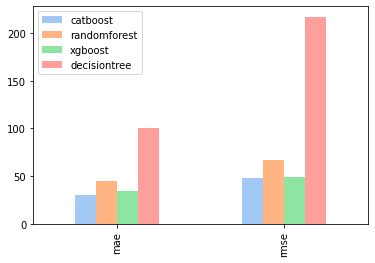

In [79]:
error_rec = {
    "catboost": {
        "mae": 30.716882441390297,
        "rmse": 47.60060928366899,
    },
    "randomforest": {
        "mae": 44.71041705197309,
        "rmse": 66.57911013186032,
    },
    "xgboost": {
        "mae": 34.24291996608175,
        "rmse": 49.34904563320801,
    },
    "decisiontree": {
        "mae": 100.22443485231393,
        "rmse": 217.1158966866856,
    },
}
pd.DataFrame(error_rec).plot(kind="bar", 
             color=[
                 sns.color_palette("pastel")[0], 
                 sns.color_palette("pastel")[1], 
                 sns.color_palette("pastel")[2], 
                 sns.color_palette("pastel")[3]]);

## Hyperparameter Tuning

### Using cross validation in catboot

In [80]:
import tqdm

In [81]:
# prepaere the out of folds predictions 
train_oof = np.zeros((X_scaled.shape[0],))
test_preds = np.zeros(test_scaled.shape[0])

NUM_FOLDS = 5
kf = KFold(n_splits=5, shuffle=True, random_state=0)


for fold, (train_idx, test_idx) in tqdm.tqdm(enumerate(kf.split(X_scaled,Y))):
    X_train, X_test = X_scaled.iloc[train_idx][test_scaled.columns], X_scaled.iloc[test_idx][test_scaled.columns]
    y_train, y_test = Y.iloc[train_idx], Y.iloc[test_idx]
    
    catb = CatBoostRegressor(iterations=500,
                         learning_rate=0.02,
                         depth=12,
                         eval_metric='RMSE',
#                         early_stopping_rounds=42,
                         random_seed = 23,
                         bagging_temperature = 0.2,
                         od_type='Iter',
                         metric_period = 75,
                         od_wait=100)
    # train model
    catb.fit(X_train, y_train,
                 eval_set=(X_test,y_test),
                 use_best_model=True,
                 verbose=True)

    oof = catb.predict(X_test)
    train_oof[test_idx] = oof
    test_preds += catb.predict(test_scaled)/NUM_FOLDS      
    print(f"out-of-folds prdiction ==== fold_{fold} RMSE",np.sqrt(mean_squared_error(oof, y_test, squared=False)))

0it [00:00, ?it/s]Warning: Overfitting detector is active, thus evaluation metric is calculated on every iteration. 'metric_period' is ignored for evaluation metric.


0:	learn: 57.3808079	test: 58.4704901	best: 58.4704901 (0)	total: 163ms	remaining: 1m 21s
75:	learn: 49.7930889	test: 51.8145562	best: 51.8145562 (75)	total: 22.4s	remaining: 2m 4s
150:	learn: 47.9402070	test: 50.7754163	best: 50.7754163 (150)	total: 46.5s	remaining: 1m 47s
225:	learn: 46.8627930	test: 50.3285179	best: 50.3285179 (225)	total: 59.1s	remaining: 1m 11s
300:	learn: 46.0775968	test: 50.0622419	best: 50.0619882 (299)	total: 1m 11s	remaining: 47.1s
375:	learn: 45.4197883	test: 49.8310721	best: 49.8310721 (375)	total: 1m 23s	remaining: 27.4s
450:	learn: 44.8301419	test: 49.6299272	best: 49.6299272 (450)	total: 1m 34s	remaining: 10.3s
499:	learn: 44.4261202	test: 49.4949737	best: 49.4949737 (499)	total: 1m 43s	remaining: 0us

bestTest = 49.49497369
bestIteration = 499



1it [01:43, 103.81s/it]

out-of-folds prdiction ==== fold_0 RMSE 7.035266427118239


0:	learn: 57.9389810	test: 56.2407455	best: 56.2407455 (0)	total: 174ms	remaining: 1m 26s
75:	learn: 50.3458336	test: 49.3889276	best: 49.3889276 (75)	total: 12.7s	remaining: 1m 10s
150:	learn: 48.4349018	test: 48.3135755	best: 48.3135755 (150)	total: 25.1s	remaining: 58s
225:	learn: 47.2943891	test: 47.8347381	best: 47.8347381 (225)	total: 38.5s	remaining: 46.7s
300:	learn: 46.4953397	test: 47.5515315	best: 47.5515315 (300)	total: 50.7s	remaining: 33.5s
375:	learn: 45.8422158	test: 47.3722570	best: 47.3716985 (374)	total: 1m 3s	remaining: 21s
450:	learn: 45.2904550	test: 47.2379103	best: 47.2379103 (450)	total: 1m 16s	remaining: 8.32s
499:	learn: 44.9196258	test: 47.1436088	best: 47.1436088 (499)	total: 1m 24s	remaining: 0us

bestTest = 47.14360884
bestIteration = 499



2it [03:09, 92.98s/it] 

out-of-folds prdiction ==== fold_1 RMSE 6.866120369789898


0:	learn: 57.6327962	test: 57.4761596	best: 57.4761596 (0)	total: 186ms	remaining: 1m 32s
75:	learn: 49.8665764	test: 50.7820954	best: 50.7820954 (75)	total: 13.3s	remaining: 1m 13s
150:	learn: 47.9014618	test: 49.8354697	best: 49.8354697 (150)	total: 25.9s	remaining: 59.9s
225:	learn: 46.7485895	test: 49.4339667	best: 49.4339667 (225)	total: 38.3s	remaining: 46.4s
300:	learn: 45.8579583	test: 49.1968255	best: 49.1968255 (300)	total: 50.8s	remaining: 33.6s
375:	learn: 45.1720438	test: 49.0556507	best: 49.0556507 (375)	total: 1m 3s	remaining: 21.1s
450:	learn: 44.6176481	test: 48.9496116	best: 48.9496116 (450)	total: 1m 16s	remaining: 8.32s
499:	learn: 44.2055766	test: 48.8744469	best: 48.8738174 (498)	total: 1m 24s	remaining: 0us

bestTest = 48.8738174
bestIteration = 498

Shrink model to first 499 iterations.


3it [04:34, 89.57s/it]

out-of-folds prdiction ==== fold_2 RMSE 6.990981142786645


0:	learn: 57.3220490	test: 58.6970562	best: 58.6970562 (0)	total: 176ms	remaining: 1m 27s
75:	learn: 49.6961377	test: 51.9364399	best: 51.9364399 (75)	total: 12.9s	remaining: 1m 11s
150:	learn: 47.8199417	test: 50.7958375	best: 50.7958375 (150)	total: 25.6s	remaining: 59.2s
225:	learn: 46.7712122	test: 50.3596728	best: 50.3596728 (225)	total: 37.9s	remaining: 46s
300:	learn: 45.9718973	test: 50.0930626	best: 50.0930626 (300)	total: 50.4s	remaining: 33.3s
375:	learn: 45.3196590	test: 49.8998552	best: 49.8998552 (375)	total: 1m 2s	remaining: 20.7s
450:	learn: 44.8052255	test: 49.7439199	best: 49.7439199 (450)	total: 1m 15s	remaining: 8.19s
499:	learn: 44.4398734	test: 49.6452027	best: 49.6452027 (499)	total: 1m 23s	remaining: 0us

bestTest = 49.64520271
bestIteration = 499



4it [05:58, 87.48s/it]

out-of-folds prdiction ==== fold_3 RMSE 7.045935179275076


0:	learn: 57.7088758	test: 57.1343071	best: 57.1343071 (0)	total: 173ms	remaining: 1m 26s
75:	learn: 50.0945484	test: 50.5527414	best: 50.5527414 (75)	total: 12.8s	remaining: 1m 11s
150:	learn: 48.1970251	test: 49.4964715	best: 49.4964715 (150)	total: 25.6s	remaining: 59.1s
225:	learn: 47.2593056	test: 49.1579937	best: 49.1579937 (225)	total: 37.8s	remaining: 45.8s
300:	learn: 46.4465513	test: 48.8865876	best: 48.8865876 (300)	total: 50.3s	remaining: 33.3s
375:	learn: 45.8455510	test: 48.7302979	best: 48.7302979 (375)	total: 1m 2s	remaining: 20.7s
450:	learn: 45.3041796	test: 48.6168964	best: 48.6168964 (450)	total: 1m 15s	remaining: 8.19s
499:	learn: 44.9395530	test: 48.5255916	best: 48.5255916 (499)	total: 1m 23s	remaining: 0us

bestTest = 48.52559163
bestIteration = 499



5it [07:23, 88.71s/it]

out-of-folds prdiction ==== fold_4 RMSE 6.966031275261981


In [82]:
import joblib


In [83]:
with open('catb_EUI.joblib', 'wb') as f:
    joblib.dump(catb,f,compress=3)

In [84]:
y_pred = catb.predict(test_scaled)

In [85]:
print(" Training data scores\n","--"*10)
print(" RMSE:", np.sqrt(mean_squared_error(test_y,y_pred)))
print(" MAE:", mean_absolute_error(test_y,y_pred))
print(" MSE:", mean_squared_error(test_y,y_pred))
print(" R2:", r2_score(test_y,y_pred))

 Training data scores
 --------------------
 RMSE: 47.95946522648822
 MAE: 31.388826361848405
 MSE: 2300.110304810733
 R2: 0.3658951685475016


### GridsearchCV

In [86]:
from catboost import CatBoost

In [87]:
grid = {'learning_rate': [0.03, 0.1],
        'depth': [4, 6, 10],
        'l2_leaf_reg': [1, 3, 5, 7, 9]}
cat_grid_search = CatBoostRegressor()

grid_search_result = cat_grid_search.grid_search(grid, 
                                       X=X_scaled, 
                                       y=Y, 
                                       cv=3,
                                       refit=True,
                                       verbose=True,
                                       plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Streaming output truncated to the last 5000 lines.
26:	learn: 66.1887787	test: 64.6785473	best: 64.6785473 (26)	total: 2.26s	remaining: 1m 21s
27:	learn: 65.4859902	test: 63.9633438	best: 63.9633438 (27)	total: 2.35s	remaining: 1m 21s
28:	learn: 64.8942022	test: 63.3610739	best: 63.3610739 (28)	total: 2.44s	remaining: 1m 21s
29:	learn: 64.2849293	test: 62.7420824	best: 62.7420824 (29)	total: 2.53s	remaining: 1m 21s
30:	learn: 63.6618571	test: 62.1027722	best: 62.1027722 (30)	total: 2.61s	remaining: 1m 21s
31:	learn: 63.0726140	test: 61.5037993	best: 61.5037993 (31)	total: 2.71s	remaining: 1m 21s
32:	learn: 62.5588793	test: 60.9876877	best: 60.9876877 (32)	total: 2.79s	remaining: 1m 21s
33:	learn: 62.0745683	test: 60.5003424	best: 60.5003424 (33)	total: 2.85s	remaining: 1m 21s
34:	learn: 61.6065111	test: 60.0265083	best: 60.0265083 (34)	total: 2.95s	remaining: 1m 21s
35:	learn: 61.1654593	test: 59.5921736	best: 59.5921736 (35)	total: 3.04s	remaining: 1m 21s
36:	learn: 60.7572742	test: 5

In [88]:
with open('catb_grid.joblib', 'wb') as f:
    joblib.dump(cat_grid_search,f,compress=3)

In [89]:
y_pred = cat_grid_search.predict(test_scaled)

In [93]:
cat_grid = CatBoostRegressor(learning_rate = 0.1,
                                    depth = 10,
                                    l2_leaf_reg = 1)
cat_grid.fit(X_scaled,Y)

0:	learn: 56.6924484	total: 317ms	remaining: 5m 17s
1:	learn: 55.7680414	total: 559ms	remaining: 4m 38s
2:	learn: 54.9016210	total: 789ms	remaining: 4m 22s
3:	learn: 54.2264233	total: 1s	remaining: 4m 10s
4:	learn: 53.6462095	total: 1.24s	remaining: 4m 6s
5:	learn: 53.0936956	total: 1.43s	remaining: 3m 56s
6:	learn: 52.6414169	total: 1.58s	remaining: 3m 44s
7:	learn: 52.2697706	total: 1.74s	remaining: 3m 36s
8:	learn: 51.9092249	total: 1.95s	remaining: 3m 35s
9:	learn: 51.5844708	total: 2.24s	remaining: 3m 41s
10:	learn: 51.3364532	total: 2.45s	remaining: 3m 40s
11:	learn: 51.1004832	total: 2.65s	remaining: 3m 38s
12:	learn: 50.9032923	total: 2.83s	remaining: 3m 35s
13:	learn: 50.6551998	total: 3.04s	remaining: 3m 34s
14:	learn: 50.4377924	total: 3.24s	remaining: 3m 33s
15:	learn: 50.2578226	total: 3.44s	remaining: 3m 31s
16:	learn: 50.0880878	total: 3.65s	remaining: 3m 30s
17:	learn: 49.9657928	total: 3.88s	remaining: 3m 31s
18:	learn: 49.8104087	total: 4.07s	remaining: 3m 30s
19:	lea

In [94]:
y_pred = cat_grid.predict(test_scaled)

In [95]:
print(" Training data scores\n","--"*10)
print(" RMSE:", np.sqrt(mean_squared_error(test_y,y_pred)))
print(" MAE:", mean_absolute_error(test_y,y_pred))
print(" MSE:", mean_squared_error(test_y,y_pred))
print(" R2:", r2_score(test_y,y_pred))

 Training data scores
 --------------------
 RMSE: 44.52894591473294
 MAE: 30.8979475856338
 MSE: 1982.827024277211
 R2: 0.4533652610489828
